# Project 4: West Nile Virus
---

## Problem Statement
---

There has been recent epidemic of West Nile Virus in Chicago. West Nile virus is most commonly spread to humans through infected mosquitos. Around 20% of people who become infected with the virus develop symptoms ranging from a persistent fever, to serious neurological illnesses that can result in death. In 2002, the first human cases of West Nile virus were reported in Chicago. By 2004 the City of Chicago and the Chicago Department of Public Health (CDPH) had established a comprehensive surveillance and control program that is still in effect today. Every week from late spring through the fall, mosquitos in traps across the city are tested for the virus. 

We are a team from the Disease And Treatment Agency, division of Societal Cures In Epidemiology and New Creative Engineering (DATA-SCIENCE). To control the spread of the virus, we have been tasked to study the data that has been collected over time and use the data to build a model and make predictions that the city of Chicago can use when it decides where to spray pesticides. A more accurate method of predicting outbreaks of West Nile virus in mosquitos will help the City of Chicago and CPHD more efficiently and effectively allocate resources towards preventing transmission of this potentially deadly virus. We will evaluate our model based on precision and AUC score.

Spraying pesticides are a necessary action in the fight for public health and safety, however it is extremely costly. To determine the effectively of our model, we will be conducting a cost-benefit analysis. This will include annual cost projections for various levels of pesticide coverage (cost) and the effect of these various levels of pesticide coverage (benefit). 

## Executive Summary
---

We started off by analyzing the four sets of data provided: train, test, weather, and spray data. The train data is the most important dataset as it contains information and results of monitoring various traps and recorded if the WNV is present or not. This data spans the years 2007, 2009, 2011 and 2013. The test data has the same features across the years 2008, 2010, 2012 and 2014. However, it does not contains the data for number of mosquitoes captured in each trap and if West Nile virus (WNV) is present. The weather dataset contains weather information for all the years between 2007 and 2013 collected from two weather stations. The spray dataset contains the locations of those regions where pesticide was applied. The data is only available for 2011 and 2013 with a total of 10 days.


The datasets were then cleaned and we filled the missing data with meaningful values. We merged the weather data to the train and test data based on date and weather station assigned to each trap by calculating the distance from trap. One hot encoding was applied to categorial features like the trap number, codesum and the types of mosquitoes caught in the traps. We also removed features with multicollinearity. Another important feature engineering that we have done is to lag the weather data by one week. This is due to the fact that the entire life cycle of the mosquito, from an egg to an adult, takes approximately 8 to 10 days and pupae develop into adult flying mosquitoes in 2 to 3 days. Using weather data that is lagged by a week will hence be more appropriate to give us a better prediction.


The train data has a highly imbalanced class where the majority class (about 95%) shows data for which WNV was not present while only about 5% of the data shows that WNV was present. We applied Synthetic Minority Over-sampling Technique (SMOTE) to oversample the minority class before using the data on our models. We then constructed five different models: Logistic regression, logistic regression with PCA, Extra trees, XGBoost and Random Forest.


To determine the overall performance of our model, we wish to reduce the number of false positives as these are the instances whereby a particular trap is predicted to have WNV presence while in actual fact, it is not. This can lead to spraying a non-infected area and result in spending extra cost on the pesticide which is highly ineffective. We are interested in a model with high precision rate: when it predicts WNV presence at a trap, it is correct most of the time. Another parameter that we are concerned with is AUC. AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between the classes. The higher the AUC, the better the model is at making the right predictions. 

Results from the 5 models are shown in the table below:
![results](../assets/results.jpg)

Based on the the results, we concluded that the XGBoost model has the best performance based on its high precision and AUC score on the test data. The top five features are 'loc', 'sunrise', 'resultspeeed', 'depart' and 'tmax_wk1'.


## Contents
- [Problem Statement](#Problem-Statement)
- [Loading files into DataFrame](#Loading-files-into-DataFrame)
- [Train DataFrame](#Train-DataFrame)
- [Spray DataFrame](#Spray-DataFrame)
- [Weather DataFrame](#Weather-DataFrame)
- [Test DataFrame](#Test-DataFrame)
- [Merging train and weather DataFrames](#Merging-train-and-weather-DataFrames)
- [Visualizing Traps onto the map ](#Visualizing-Traps-onto-the-map )
- [EDA visualization](#EDA-visualization)
- [Feature Selection](#Feature-Selection)
- [Modelling](#Modelling)
- [Conclusions](#Conclusions)


#### Data Dictionary for merged_df

|Column Name|Data type| Description|
|:--|:--|:--|
|date|datetime64|Date that the WNV test is performed in 2007, 2009, 2011, 2013|
|address|object|Approximate address of the location of trap. This is used to send to the GeoCoder|
|species| object|6 Species of CULEX mosquitos|   
|block |int64|Block number of address|     
|street|object|Street name|
|trap|object|Id of the trap|
|addressnumberandstreet|object|Approximate address returned from GeoCoder|       
|latitude|float64|Latitude returned from GeoCoder|       
|longitude|float64|Longitude returned from GeoCoder|       
|addressaccuracy|int64 |Accuracy returned from GeoCoder|        
|wnvpresent|int64|Whether West Nile Virus was present in these mosquitos. 1 : WNV is present, 0 : not present.|       
|nummosquitos|int64|number of mosquitoes caught in a particular trap|         
|year|int64|year|         
|month|int64  |month|       
|day|int64|day|         
|station|float64|nearest weather station|       
|stn_distance|float64|distance to the nearest weather station|
|tmax|int64|Maximum temperature in Degrees Fahrenheit|         
|tmin|int64|Minimum temperature in Degrees Fahrenheit|         
|tavg|float64|Average temperature in Degrees Fahrenheit|       
|depart|float64|Departure from normal|       
|dewpoint|int64|Average dew point|         
|wetbulb|float64|Average wet bulb|       
|heat|float64|Heating (Season begins with Jul)|       
|cool|float64|Cooling (Season begins with Jan)|
|sunrise|float64|Sunrise (calculated)|       
|sunset |float64|Sunset (calculated)|       
|codesum|object|Weather Phenomena|        
|preciptotal|float64|Precipitation|       
|stnpressure| float64 |Average station pressure| 
|sealevel|float64 |Average sea level pressure|      
|resultspeed|float64|Resultant Wind Speed|       
|resultdir|int64 |Resultant Wind Direction|        
|avgspeed|float64|Average speed| 
|tmax_wk1|int64|tmax lag by a week|         
|tmin_wk1|int64|tmin lag by a week|         
|tavg_wk1|float64|tavg lag by a week|              
|dewpoint_wk1|int64|dewpoint lag by a week|         
|wetbulb_wk1|float64|wetbulb lag by a week|       
|heat_wk1|float64|heat lag by a week|       
|cool_wk1|float64|cool lag by a week|       
|preciptotal_wk1|float64|preciptotal lag by a week| 
|cs_fg|int64 |one hot encoded codesum for FG|        
|cs_vcts|int64|one hot encoded codesum for VCTS|         
|cs_tsra|int64|one hot encoded codesum for TSRA|         
|cs_br|int64|one hot encoded codesum for BR|         
|cs_hz|int64|one hot encoded codesum for HZ|         
|cs_ts|int64|one hot encoded codesum for TS|         
|cs_na|int64|one hot encoded codesum for NA|         
|cs_dz|int64|one hot encoded codesum for DZ|         
|cs_ra|int64|one hot encoded codesum for RA|
|s_cpr|int64|one hot encoded species for CULEX PIPIENS/RESTUANS|   
|s_cp|int64|one hot encoded species for CULEX RESTUANS|   
|s_cr|int64|one hot encoded species for CULEX PIPIENS|               
|loc|float64 |interaction term of latitude and longtitudes|      
  

Importing standard libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import descartes
import warnings
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, recall_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

from math import sin, cos, sqrt, atan2, radians
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
plt.style.use('seaborn')

In [3]:
# Predefining the data files in a dictionary for easy file maintenance
data_files = {
    'train' : '../assets/train.csv',
    'test' : '../assets/test.csv',
    'spray' : '../assets/spray.csv',
    'weather' : '../assets/weather.csv',
    'mapdata_rds' : '../assets/mapdata_copyright_openstreetmap_contributors.rds',
    'mapdata_txt' : '../assets/mapdata_copyright_openstreetmap_contributors.txt',
    'shp' : '../assets/Boundaries_cities/geo_export_095d1d3d-b302-4bae-8a12-f6f48cb71b9f.shp',
    'merged_data': '../assets/merged.csv',
    'submit' : '../assets/submission.csv'
}

In [4]:
# NA options to use for read_csv
na_opt = {
    'train' : None,
    'test' : None,
    'spray' : None,
    'weather' : ['M','-']
}

---
## Loading files into DataFrame
[top](#Contents)

In [5]:
# Prededefine dictionary to hold all data
all_data = dict()

In [6]:
# Loading csv files into DataFrame
for file in list(data_files.keys())[:4]:
    key = f'{file}_df'
    print('-----------------------------------')
    print(f'Loading DataFrame for {file} data')
    print('-----------------------------------')
    all_data[key] = pd.read_csv(data_files[file], na_values=na_opt[file])
    print(f'shape for {file}: {all_data[key].shape}\n')

-----------------------------------
Loading DataFrame for train data
-----------------------------------
shape for train: (10506, 12)

-----------------------------------
Loading DataFrame for test data
-----------------------------------
shape for test: (116293, 11)

-----------------------------------
Loading DataFrame for spray data
-----------------------------------
shape for spray: (14835, 4)

-----------------------------------
Loading DataFrame for weather data
-----------------------------------
shape for weather: (2944, 22)



In [7]:
# Checking column information
for data in all_data.keys():
    print('-----------------------------------')
    print(f'check column information for {data}')
    print('-----------------------------------')
    display(all_data[data].info())

-----------------------------------
check column information for train_df
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)

None

-----------------------------------
check column information for test_df
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


None

-----------------------------------
check column information for spray_df
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


None

-----------------------------------
check column information for weather_df
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2933 non-null   float64
 5   Depart       1472 non-null   float64
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2940 non-null   float64
 8   Heat         2933 non-null   float64
 9   Cool         2933 non-null   float64
 10  Sunrise      1472 non-null   float64
 11  Sunset       1472 non-null   float64
 12  CodeSum      2944 non-null   object 
 13  Depth        1472 non-null   float64
 14  Water1       0 non-null      float64
 15  SnowFall     1472 non-null   object 
 16  PrecipTotal  2942 no

None

In [8]:
# Checking for Null
for data in all_data.keys():
    print('-----------------------------------')
    print(f'checking for null in {data}')
    display(all_data[data].isnull().sum())

-----------------------------------
checking for null in train_df


Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

-----------------------------------
checking for null in test_df


Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

-----------------------------------
checking for null in spray_df


Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

-----------------------------------
checking for null in weather_df


Station           0
Date              0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

---
## Train DataFrame
[top](#Contents)

In [9]:
train_df = all_data['train_df']

In [10]:
# Convert column names into lowercase
train_df.columns = map(str.lower, train_df.columns)

---
95% of the traps were negative for West Nile Virus.
This means that our dataset is imbalanced.

In [11]:
# 95% of the traps were negative for WNV
train_df['wnvpresent'].value_counts(normalize=True)

0    0.947554
1    0.052446
Name: wnvpresent, dtype: float64

---
Merging of rows that were split when nummosquitos > 50

In [12]:
# check on the shape before merging the rows
train_df.shape

(10506, 12)

In [13]:
# Check for rows that have NumMosquitos == 50, potentially have to merge with another row
len(train_df[train_df['nummosquitos']>=50])

1019

In [14]:
train_df = train_df.groupby(['date','address','species','block','street',
                                 'trap','addressnumberandstreet',
                                 'latitude','longitude','addressaccuracy','wnvpresent'
                                ])['nummosquitos'].sum().reset_index(name='nummosquitos')

In [15]:
# check on the shape after merging the rows
train_df.shape

(8610, 12)

---
Converting Date to datetime datatype

In [16]:
# Converting Date column to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
# Creating year and month columns, for easy analysis moving forward
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
# Checking datatypes for train_df
train_df.dtypes

date                      datetime64[ns]
address                           object
species                           object
block                              int64
street                            object
trap                              object
addressnumberandstreet            object
latitude                         float64
longitude                        float64
addressaccuracy                    int64
wnvpresent                         int64
nummosquitos                       int64
year                               int64
month                              int64
day                                int64
dtype: object

In [17]:
# Looking at the unique years contained in train_df
list(train_df['year'].unique())

[2007, 2009, 2011, 2013]

In [18]:
# Looking at data available across the years
train_df['year'].value_counts()

2007    2837
2013    2058
2009    1921
2011    1794
Name: year, dtype: int64

In [19]:
# Looking at data spread across the months
train_df['month'].value_counts(normalize=True).sort_index()

5     0.009408
6     0.155285
7     0.246225
8     0.329268
9     0.229152
10    0.030662
Name: month, dtype: float64

In [20]:
# weather stations information
weather_stns ={
    'station1' : {
        'name': "CHICAGO O'HARE INTERNATIONAL AIRPORT",
        'lon': -87.933,
        'lat': 41.995,
        'elev': 662
    },
    'station2' : {
        'name': "CHICAGO MIDWAY INTL ARPT",
        'lon': -87.752,
        'lat': 41.786,
        'elev': 612
    }
}

In [21]:
# (added 14 Sep 2020)
# Function to calculate distance between 2 sets of longitude and latitude
def cal_distance(lat1, lon1, lat2, lon2):
    """ 
    Function to calculate distance between 2 sets of longitude and latitude
    
    Parameters: 
		lat1 (float): latitude of the first location
        lon1 (float): longtitude of the first location
        lat2 (float): latitude of the second location
        lon2 (float): longtitude of the second location
  
    Returns: 
		float: distance between the 2 locations in km 
  
    """
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # 6373.0 approximate radius of earth in km
    return round(6373.0 * c, 4)

In [22]:
# (added 14 Sep 2020)
# Function to calculate the nearest weather station and distance
def nearest_stn(df):
    """ 
    Function to calculate the nearest weather station and distance
    
    Parameters: 
		df (DataFrame): DataFrame with holding the position information
  
    Returns: 
		None: 
  
    """
    for row in df.itertuples():
        index = row.Index
        lat = row.latitude
        lon = row.longitude
        
        stn1 = abs(cal_distance(lat, lon, 
                            weather_stns['station1']['lat'], 
                            weather_stns['station1']['lon']))
        stn2 = abs(cal_distance(lat, lon, 
                            weather_stns['station2']['lat'], 
                            weather_stns['station2']['lon']))
        
        if stn1 < stn2:
            df.loc[index, "station"] = 1
            df.loc[index, "stn_distance"] = stn1
        else:
            df.loc[index, "station"] = 2
            df.loc[index, "stn_distance"] = stn2
    return

In [23]:
# get nearest weather station for train_df
nearest_stn(train_df)

In [24]:
# distance between the 2 weather stations
dist = cal_distance(weather_stns['station1']['lat'],
                    weather_stns['station1']['lon'],
                    weather_stns['station2']['lat'], 
                    weather_stns['station2']['lon'])
print(f'Distance between the 2 weather stations is: {dist}km')

Distance between the 2 weather stations is: 27.6593km


---
## Spray DataFrame
[top](#Contents)

In [25]:
spray_df = all_data['spray_df']

In [26]:
# Convert column names into lowercase
spray_df.columns = map(str.lower, spray_df.columns)

In [27]:
# Converting Date column to datetime
spray_df['date'] = pd.to_datetime(spray_df['date'])

# Creating year and month columns
spray_df['year'] = spray_df['date'].dt.year
spray_df['month'] = spray_df['date'].dt.month
spray_df['day'] = spray_df['date'].dt.day
spray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       14835 non-null  datetime64[ns]
 1   time       14251 non-null  object        
 2   latitude   14835 non-null  float64       
 3   longitude  14835 non-null  float64       
 4   year       14835 non-null  int64         
 5   month      14835 non-null  int64         
 6   day        14835 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 811.4+ KB


In [28]:
# Looking at the years available in spray data
list(spray_df['date'].dt.year.unique())

[2011, 2013]

In [29]:
# Looking at the months available in spray data
list(spray_df['date'].dt.month.unique())

[8, 9, 7]

In [30]:
spray_df['date'].value_counts(normalize=True)

2013-08-15    0.179845
2013-08-29    0.155174
2013-07-17    0.148433
2011-09-07    0.142501
2013-07-25    0.108325
2013-08-22    0.106977
2013-08-08    0.080553
2013-09-05    0.062285
2013-08-16    0.009505
2011-08-29    0.006404
Name: date, dtype: float64

In [31]:
spray_df.head()

,date,time,latitude,longitude,year,month,day
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011,8,29
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011,8,29
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,2011,8,29
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,2011,8,29
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,2011,8,29


In [32]:
spray_df['date'].value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: date, dtype: int64

In [33]:
# distance between the spray info on 2011-08-29, seems very far away
dist = cal_distance(weather_stns['station1']['lat'],
                    weather_stns['station1']['lon'],
                    42.391623, -88.089163)
print(f'Distance between the 2 weather stations is: {dist}km')

Distance between the 2 weather stations is: 45.955km


In [34]:
# distance between the spray info on 2011-09-07, seems very far away
dist = cal_distance(weather_stns['station1']['lat'],
                    weather_stns['station1']['lon'],
                    41.988837, -87.817002)
print(f'Distance between the 2011-09-07 stations is: {dist}km')

Distance between the 2011-09-07 stations is: 9.6141km


---
## Weather DataFrame
[top](#Contents)

In [35]:
w_df = all_data['weather_df']

In [36]:
# Convert column names into lowercase
w_df.columns = map(str.lower, w_df.columns)

In [37]:
w_df.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,codesum,depth,water1,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,,0.0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,NaN,51,57.0,0.0,3.0,...,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,BR,0.0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,NaN,42,47.0,13.0,0.0,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,,0.0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9


In [38]:
# Converting date column into datetime datatype
w_df['date'] = pd.to_datetime(w_df['date'])

# Split Date (ojbect) into day, month and year
# This will be useful later when EDA and modelling are performed
w_df['year'] = w_df.date.dt.year
w_df['month'] = w_df.date.dt.month
w_df['day'] = w_df.date.dt.day

In [39]:
list(w_df['date'].dt.year.unique())

[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

In [40]:
# Check on the datatype
w_df.dtypes

station                 int64
date           datetime64[ns]
tmax                    int64
tmin                    int64
tavg                  float64
depart                float64
dewpoint                int64
wetbulb               float64
heat                  float64
cool                  float64
sunrise               float64
sunset                float64
codesum                object
depth                 float64
water1                float64
snowfall               object
preciptotal            object
stnpressure           float64
sealevel              float64
resultspeed           float64
resultdir               int64
avgspeed              float64
year                    int64
month                   int64
day                     int64
dtype: object

From the output above, we can see that all columns are numerical except for CodeSum, SnowFall and PrecipTotal. `CodeSum` is the code for weather condition at a given day, so it is sensible that it is not numerical. However, the other 2 columns are ought to be numerical. Let's look into each of the 2 columns to find out if there is any invalid value that is causing it to be categorical.

---
### Snowfall and PrecipTotal Column

In [41]:
# Unique values of SnowFall
w_df.snowfall.unique()

array(['0.0', nan, '  T', '0.1'], dtype=object)

In [42]:
# Unique values of PrecipTotal
w_df.preciptotal.unique()

array(['0.00', '  T', '0.13', '0.02', '0.38', '0.60', '0.14', '0.07',
       '0.11', '0.09', '1.01', '0.28', '0.04', '0.08', '0.01', '0.53',
       '0.19', '0.21', '0.32', '0.39', '0.31', '0.42', '0.27', '0.16',
       '0.58', '0.93', '0.05', '0.34', '0.15', '0.35', nan, '0.40',
       '0.66', '0.30', '0.24', '0.43', '1.55', '0.92', '0.89', '0.17',
       '0.03', '1.43', '0.97', '0.26', '1.31', '0.06', '0.46', '0.29',
       '0.23', '0.41', '0.45', '0.83', '1.33', '0.91', '0.48', '0.37',
       '0.88', '2.35', '1.96', '0.20', '0.25', '0.18', '0.67', '0.36',
       '0.33', '1.28', '0.74', '0.76', '0.71', '0.95', '1.46', '0.12',
       '0.52', '0.64', '0.22', '1.24', '0.72', '0.73', '0.65', '1.61',
       '1.22', '0.50', '1.05', '2.43', '0.59', '2.90', '2.68', '1.23',
       '0.62', '6.64', '3.07', '1.44', '1.75', '0.82', '0.80', '0.86',
       '0.63', '0.55', '1.03', '0.70', '1.73', '1.38', '0.44', '1.14',
       '1.07', '3.97', '0.87', '0.78', '1.12', '0.68', '0.10', '0.61',
       '0.

Here we see that ' T' are present in both the columns. Checking through the data dictionary document shows that the code 'T' actually represents 'Trace' amount of either Snow or Precipitation. We can easily replace the value with 0 since it was only traced amount that was **not measurable by the sensory equipment.**

In [43]:
# Replacing SnowFall 'T' with 0
w_df['snowfall'] = w_df['snowfall'].replace('  T', 0).astype(float)

# Replacing PrecipTotal 'T' with 0
w_df['preciptotal'] = w_df['preciptotal'].replace('  T', 0).astype(float)

# Sanity check on the data type after cleaning
w_df.dtypes

station                 int64
date           datetime64[ns]
tmax                    int64
tmin                    int64
tavg                  float64
depart                float64
dewpoint                int64
wetbulb               float64
heat                  float64
cool                  float64
sunrise               float64
sunset                float64
codesum                object
depth                 float64
water1                float64
snowfall              float64
preciptotal           float64
stnpressure           float64
sealevel              float64
resultspeed           float64
resultdir               int64
avgspeed              float64
year                    int64
month                   int64
day                     int64
dtype: object

## Codesum Column

Only days with weather condition will be recorded in the dataset. Hence, empty strings in this column actually means that it is a weather-wise uneventful day. We can replace all empty string with 'NA' to indicate that.

In [44]:
# Checking on the composition of CodeSum
w_df.codesum.head()

0         
1         
2       BR
3    BR HZ
4         
Name: codesum, dtype: object

In [45]:
# Replace all empty string with 'NA'
w_df.codesum.replace(' ', 'NA', inplace=True)

In [46]:
# Sanity Check
w_df.codesum.head()

0       NA
1       NA
2       BR
3    BR HZ
4       NA
Name: codesum, dtype: object

## Data Exploration

In [47]:
w_df.station.value_counts()

1    1472
2    1472
Name: station, dtype: int64

In [48]:
# Station 1
w_df.groupby('station').get_group(1).isnull().sum()

station           0
date              0
tmax              0
tmin              0
tavg              0
depart            0
dewpoint          0
wetbulb           3
heat              0
cool              0
sunrise           0
sunset            0
codesum           0
depth             0
water1         1472
snowfall          0
preciptotal       0
stnpressure       2
sealevel          5
resultspeed       0
resultdir         0
avgspeed          0
year              0
month             0
day               0
dtype: int64

In [49]:
# Station 2
w_df.groupby('station').get_group(2).isnull().sum()

station           0
date              0
tmax              0
tmin              0
tavg             11
depart         1472
dewpoint          0
wetbulb           1
heat             11
cool             11
sunrise        1472
sunset         1472
codesum           0
depth          1472
water1         1472
snowfall       1472
preciptotal       2
stnpressure       2
sealevel          4
resultspeed       0
resultdir         0
avgspeed          3
year              0
month             0
day               0
dtype: int64

From the missing value above, we can see that `Water1` is totally missing from the dataframe. So we may just drop it straight away. However, there are many columns that are totally missing in Station 2, but not Station 1. 

In [50]:
# Dropping 'Water1' from the dataframe
w_df.drop('water1', axis=1, inplace=True)

In [51]:
w_df[w_df['date'] == '2007-05-03'][['tavg', 'depart', 'heat', 'cool','sunrise', 'sunset', 'depth', 'snowfall']]

,tavg,depart,heat,cool,sunrise,sunset,depth,snowfall
4,56.0,2.0,9.0,0.0,446.0,1851.0,0.0,0.0
5,58.0,NaN,7.0,0.0,NaN,NaN,NaN,NaN


In [52]:
w_df[w_df['date'] == '2007-07-03'][['tavg', 'depart', 'heat', 'cool','sunrise', 'sunset', 'depth', 'snowfall']]

,tavg,depart,heat,cool,sunrise,sunset,depth,snowfall
126,72.0,0.0,0.0,7.0,421.0,1931.0,0.0,0.0
127,73.0,NaN,0.0,8.0,NaN,NaN,NaN,NaN


In [53]:
# Forward filling to replace all missing value at Station 2 with Station 1 data
w_df.fillna(method='ffill', inplace=True)

In [54]:
w_df[w_df['date'] == '2007-05-03'][['tavg', 'depart', 'heat', 'cool','sunrise', 'sunset', 'depth', 'snowfall']]

,tavg,depart,heat,cool,sunrise,sunset,depth,snowfall
4,56.0,2.0,9.0,0.0,446.0,1851.0,0.0,0.0
5,58.0,2.0,7.0,0.0,446.0,1851.0,0.0,0.0


---
### Creating time lag fields

In [55]:
# setting date as index
w_df.set_index('date', inplace=True)

In [56]:
lag_df = pd.DataFrame()
new_feats = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool', 'preciptotal']
suffix = '_wk1'
shift = 14

for yr in w_df.index.year.unique():
    tmp_df = w_df[w_df.index.year==yr].copy()
    print(f'w_df shape for {yr} is {tmp_df.shape}')
    for feat in new_feats:
        tmp_df[f'{feat}{suffix}'] = tmp_df[feat].shift(shift)
        tmp_df[f'{feat}{suffix}'].fillna(tmp_df[feat], inplace=True)
    lag_df = pd.concat([lag_df, tmp_df])

w_df shape for 2007 is (368, 23)
w_df shape for 2008 is (368, 23)
w_df shape for 2009 is (368, 23)
w_df shape for 2010 is (368, 23)
w_df shape for 2011 is (368, 23)
w_df shape for 2012 is (368, 23)
w_df shape for 2013 is (368, 23)
w_df shape for 2014 is (368, 23)


In [57]:
# assign lag_df back to w_df
w_df = lag_df

We tested lagging by 7 days to 20 days and found that the optimal number of days of lagging is 14. This gave us the best prediction score. Lagging the weather data by 14 days coincides with the life cycle of an adult mosquito, where the weather conditions are optimal for the eggs to hatch. When the mosquitoes are most active and grow to a certain population, some of them are then caught in the trap.

---
## Test DataFrame
[top](#Contents)

In [58]:
test_df = all_data['test_df']

In [59]:
# Convert column names into lowercase
test_df.columns = map(str.lower, test_df.columns)
test_df.set_index('id', inplace=True)
# Converting date column into datetime datatype
test_df['date'] = pd.to_datetime(test_df['date'])

In [60]:
test_df.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy
id,,,,,,,,,,
1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


---
## Merging train and weather DataFrames
[top](#Contents)

In [61]:
# check on shape before merging
print(f'train_df shape: {train_df.shape}')
print(f'w_df shape:\t{w_df.shape}')

train_df shape: (8610, 17)
w_df shape:	(2944, 31)


In [62]:
# merging of train_df and w_df 
merged_df = pd.merge(train_df, w_df, on=['date','station'])

In [63]:
merged_df.shape

(8610, 47)

In [64]:
merged_df.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,...,month_y,day_y,tmax_wk1,tmin_wk1,tavg_wk1,dewpoint_wk1,wetbulb_wk1,heat_wk1,cool_wk1,preciptotal_wk1
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,5,29,87.0,60.0,74.0,44.0,58.0,0.0,9.0,0.0
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,5,29,87.0,60.0,74.0,44.0,58.0,0.0,9.0,0.0
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,...,5,29,87.0,60.0,74.0,44.0,58.0,0.0,9.0,0.0
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,...,5,29,87.0,60.0,74.0,44.0,58.0,0.0,9.0,0.0
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,...,5,29,87.0,60.0,74.0,44.0,58.0,0.0,9.0,0.0


In [65]:
# check on unique values for snowfall and depth columns 
print(f'unqiue values for snowfall: {merged_df["snowfall"].unique()}')
print(f'unqiue values for depth: {merged_df["depth"].unique()}')

unqiue values for snowfall: [0.]
unqiue values for depth: [0.]


In [66]:
# drop duplicated year, month and day columns
merged_df.drop(['year_y', 'month_y', 'day_y'], axis=1, inplace=True)
# drop snowfall and depth as both columns contains only 0
merged_df.drop(['snowfall', 'depth'], axis=1, inplace=True)

In [67]:
# remove column suffix added during merging
merged_df.columns = merged_df.columns.str.replace('_x', '')

### split the codesum values and encode them into columns

In [68]:
# Function to encode the codesum column
def codesum_encode(df):
    """ 
    Function to encode the codesum column
    
    Parameters: 
		df (DataFrame): DataFrame to be processed
  
    Returns: 
		None: 
  
    """
    cs = []
    for code_str in df["codesum"].unique():
        cs.extend(code_str.lower().split(' '))
    cs = list(set(cs))
    print(f'unique codesum to be encoded to columns {cs}')
    for code in cs:
        df[f'cs_{code}'] = df["codesum"].map(lambda x : 1 if code in x else 0)
    return

In [69]:
# check on the unique values in codesum
print(f'unqiue values for codesum: {merged_df["codesum"].unique()}')
# encode codesum column
codesum_encode(merged_df)

unqiue values for codesum: ['BR HZ' 'RA BR' 'TSRA BR HZ VCTS' 'NA' 'TS TSRA RA BR HZ VCTS'
 'TSRA RA BR VCTS' 'DZ BR' 'RA BR HZ' 'HZ' 'VCTS' 'TSRA RA DZ BR HZ'
 'TSRA BR HZ' 'TSRA RA' 'TS TSRA RA BR' 'TSRA RA BR' 'BR' 'TSRA HZ' 'TSRA'
 'RA' 'TS TSRA BR' 'RA DZ BR' 'TS TSRA BR HZ' 'TS TSRA RA VCTS' 'TSRA BR'
 'TS' 'TS BR' 'FG BR HZ' 'TS TSRA RA FG BR HZ']
unique codesum to be encoded to columns ['tsra', 'br', 'na', 'hz', 'ts', 'ra', 'dz', 'vcts', 'fg']


### Encode and new features

In [70]:
# Function to encode features
def features_encode(df, pos_traps):
    """ 
    Function to encode features
    carrier column 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 
    'CULEX PIPIENS' coded to 1 other species coded to 0
    loc column latitube * longitude
    positive_trap coded to 1 if WNV was present in trap
    
    Parameters: 
		df (DataFrame): DataFrame to be processed
        pos_traps (list): List of positive traps in train data
  
    Returns: 
		None: 
  
    """
    species = {'s_cpr': 'CULEX PIPIENS/RESTUANS', 
               's_cr': 'CULEX RESTUANS', 
               's_cp': 'CULEX PIPIENS'}
    for s in species.keys():
        df[s] = df['species'].map(lambda x : 1 if x==species[s] else 0)
    #df['carrier'] = df['species'].map(lambda x : 1 if 'RESTUANS' in x or 'PIPIENS' in x else 0)
    df['loc'] = df['latitude']* df['longitude']
    #df['positive_trap'] = df['trap'].map(lambda t : 1 if t in pos_traps else 0)
    return

In [71]:
# List of traps that tested positive for WNV
pos_traps = list(train_df[train_df['wnvpresent']==1]['trap'].unique())

In [72]:
# check on the unique values in species
print(f'unqiue values for species: {merged_df["species"].unique()}')
# encode features 
features_encode(merged_df, pos_traps)

unqiue values for species: ['CULEX PIPIENS/RESTUANS' 'CULEX RESTUANS' 'CULEX PIPIENS'
 'CULEX SALINARIUS' 'CULEX TERRITANS' 'CULEX TARSALIS' 'CULEX ERRATICUS']


In [73]:
merged_df.to_csv(data_files['merged_data'], index=False)

In [74]:
merged_df.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,...,cs_hz,cs_ts,cs_ra,cs_dz,cs_vcts,cs_fg,s_cpr,s_cr,s_cp,loc
0,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,0,0,0,0,0,0,1,0,0,-3669.828863
1,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,0,0,0,0,0,0,0,1,0,-3669.828863
2,2007-05-29,"1100 South Peoria Street, Chicago, IL 60608, USA",CULEX RESTUANS,11,S PEORIA ST,T091,"1100 S PEORIA ST, Chicago, IL",41.862292,-87.648860,8,...,0,0,0,0,0,0,0,1,0,-3669.182171
3,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",CULEX RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,...,0,0,0,0,0,0,0,1,0,-3672.428319
4,2007-05-29,"1500 North Long Avenue, Chicago, IL 60651, USA",CULEX RESTUANS,15,N LONG AVE,T153,"1500 N LONG AVE, Chicago, IL",41.907645,-87.760886,8,...,0,0,0,0,0,0,0,1,0,-3677.852055


---
## Analysis of the traps

In [75]:
# checking for traps that have moved
for trap in list(train_df['trap'].unique()):
    chk_trap = train_df[train_df['trap']==trap][['trap','latitude','longitude']].copy()
    chk_trap.drop_duplicates(['trap','latitude','longitude'], keep='last', inplace=True)
    if len(chk_trap) > 1:
        display(chk_trap)

,trap,latitude,longitude
2592,T009,41.981964,-87.812827
8590,T009,41.992478,-87.862995


,trap,latitude,longitude
2695,T035,41.836644,-87.677737
8571,T035,41.763733,-87.742302


We have found 2 traps, T009 and T035 where the location of the traps have changed. It is unsure if they have moved the trap location or if there is error when collecting the data. We will keep this in mind when doing more analysis on the traps later.

Check on traps with WNV positive across the years

In [76]:
mask = (train_df['year']==2007) & (train_df['wnvpresent']==1)
train_df[mask]['trap'].value_counts().head()

T115    12
T138     9
T011     7
T135     7
T086     7
Name: trap, dtype: int64

In [77]:
mask = (train_df['year']==2009) & (train_df['wnvpresent']==1)
train_df[mask]['trap'].value_counts().head()

T900    2
T903    2
T095    2
T002    1
T009    1
Name: trap, dtype: int64

In [78]:
mask = (train_df['year']==2011) & (train_df['wnvpresent']==1)
train_df[mask]['trap'].value_counts().head()

T900    12
T903     7
T223     5
T003     3
T114     2
Name: trap, dtype: int64

In [79]:
mask = (train_df['year']==2013) & (train_df['wnvpresent']==1)
train_df[mask]['trap'].value_counts().head()

T900    15
T225     8
T013     8
T003     7
T235     7
Name: trap, dtype: int64

Trap ID T900 seems to have a high occurence where WNV was found to be present in the mosquitoes caught. More surveillance effort might be needed for this area proned to breeding of mosquitoes carring the WNV virus. Another hotspot seems to be T225. 

---
## Visualizing Traps onto the map 
[top](#Contents)

In [80]:
# Reading the shp file
street_map = gpd.read_file(data_files['shp'])

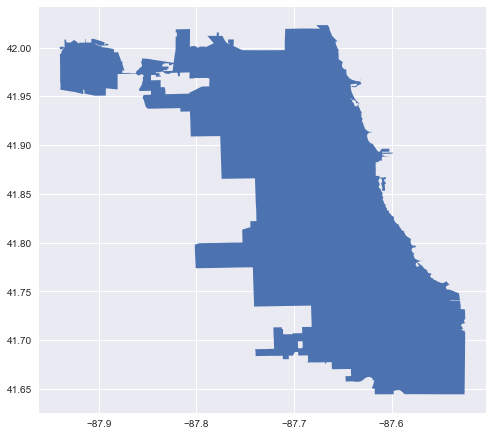

In [81]:
# Plotting basic shape of the map
fig,ax = plt.subplots(figsize = (8,8))
street_map.plot(ax=ax);

---
### Preparing GeoDataFrames for plotting into map

In [82]:
# init Coordinate Reference Systems
crs = {'init': 'epsg:4326'}

# Converting Latitude and Longitude to geo points
geo = [Point(xy) for xy in zip(train_df['longitude'], train_df['latitude'])]
# Creating a GeoDataFrame for train data
geo_df = gpd.GeoDataFrame(train_df, crs=crs, geometry=geo)

In [83]:
# Preparing station locations to be plotted
station = {'station': ['Station1', 'Station2'], 'geometry': [Point(-87.933,41.995), Point(-87.752,41.786)]}
# Creating GeoDataFrame for weather station data
geo_stn = gpd.GeoDataFrame(station, crs=crs)

In [84]:
# Converting spray locations into geo points
geo_s = [Point(xy) for xy in zip(spray_df['longitude'], spray_df['latitude'])]
# Creating GeoDataFrame for spray data
geo_spray = gpd.GeoDataFrame(spray_df, crs=crs, geometry=geo_s)

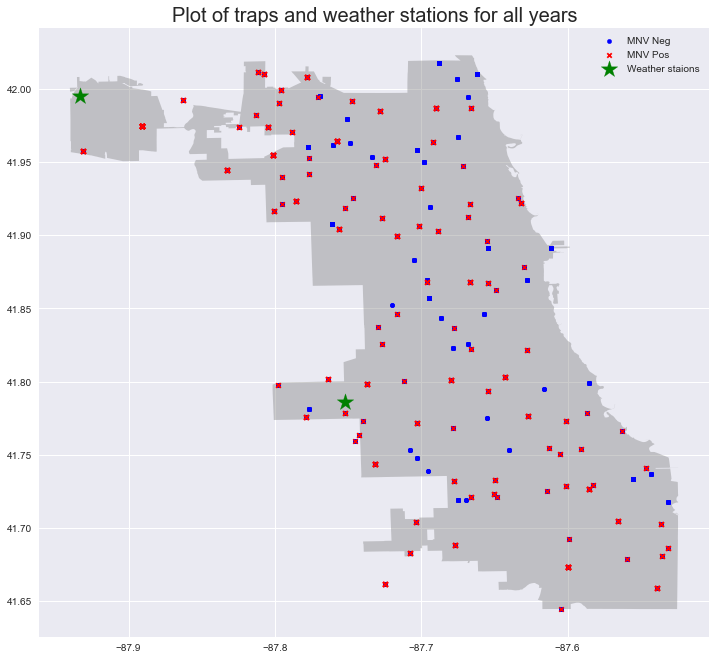

In [85]:
# Plotting the weather stations with postive and negative classes into the map
fig,ax = plt.subplots(figsize = (12,12))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['wnvpresent']==0].plot(ax=ax, markersize=20, color='blue',marker='o', label='MNV Neg')
geo_df[geo_df['wnvpresent']==1].plot(ax=ax, markersize=20, color='red',marker='x', label='MNV Pos')
geo_stn.plot(ax=ax, markersize=300, color='green', marker='*', label='Weather staions');
plt.title('Plot of traps and weather stations for all years', fontdict={'fontsize':20})
plt.legend();

From the overview of traps and their conditions across the 4 years in our train dataset, it was shown that traps have been set up all over the city of Chicago. There were some traps that have not been tested positive for WNV virus, but more than 50% of the traps had past cases of both negative and positive presence of the virus. From the geo plot, it is also seen that more locations in our dataset were assigned weather conditions from station 2. The virus presence at the southern part of the city seems to be more prevalent as there were less traps that were free from the virus presence in all four years of records. Another hotspot seems to be near station 1. We will look at the breakdown by years.

---
## Plotting with Spray information

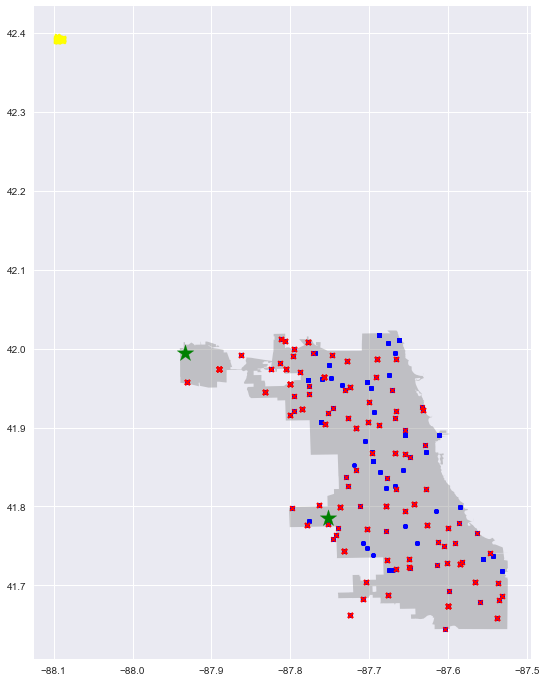

In [86]:
# spray location on date '2011-08-29' 
fig,ax = plt.subplots(figsize = (12,12))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_spray[geo_spray['date']=='2011-08-29'].plot(ax=ax, markersize=20, color='yellow',marker='x')
geo_df[geo_df['wnvpresent']==0].plot(ax=ax, markersize=20, color='blue',marker='o', label='Neg')
geo_df[geo_df['wnvpresent']==1].plot(ax=ax, markersize=20, color='red',marker='x', label='Pos')
geo_stn.plot(ax=ax, markersize=300, color='green',marker='*');

The location of spray was quite off for '2011-08-29' as it was not within the city of Chicago.
There may be errors in the data and we may want to exclude it from our analyse.

In [87]:
# filtering out 2011-08-29 spray data for these plots
geo_spray = geo_spray[geo_spray['date']!='2011-08-29']

---
### Plot traps on the map across years

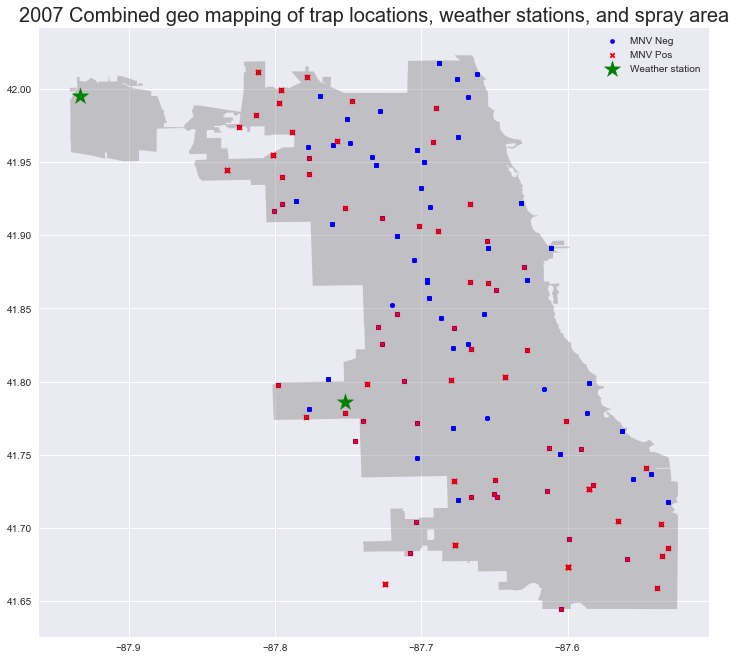

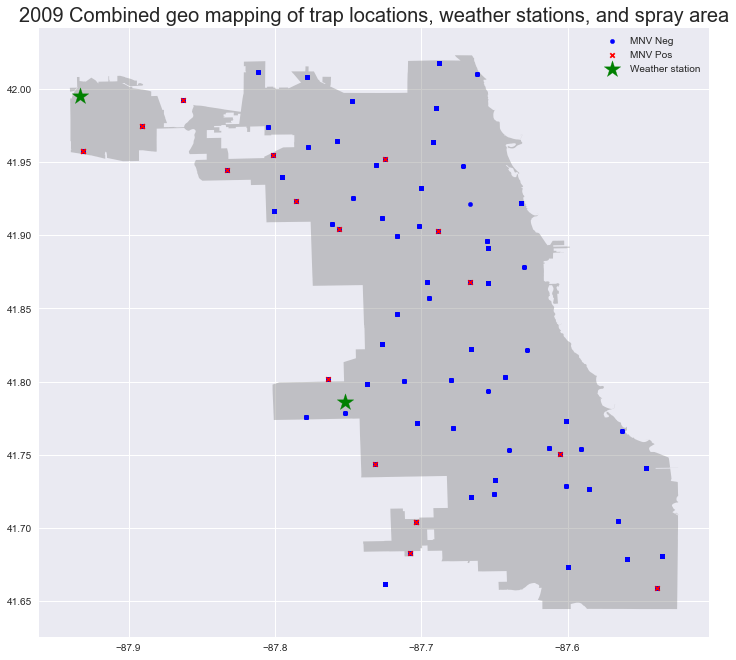

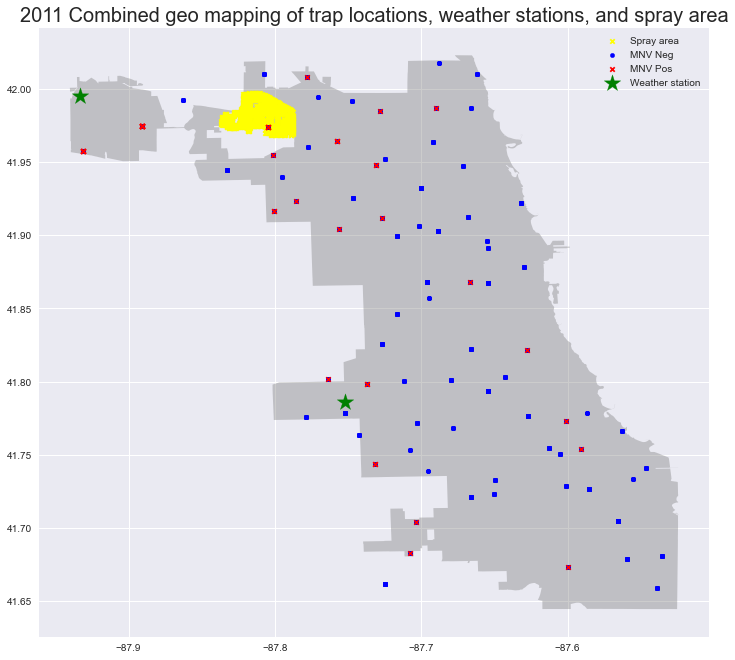

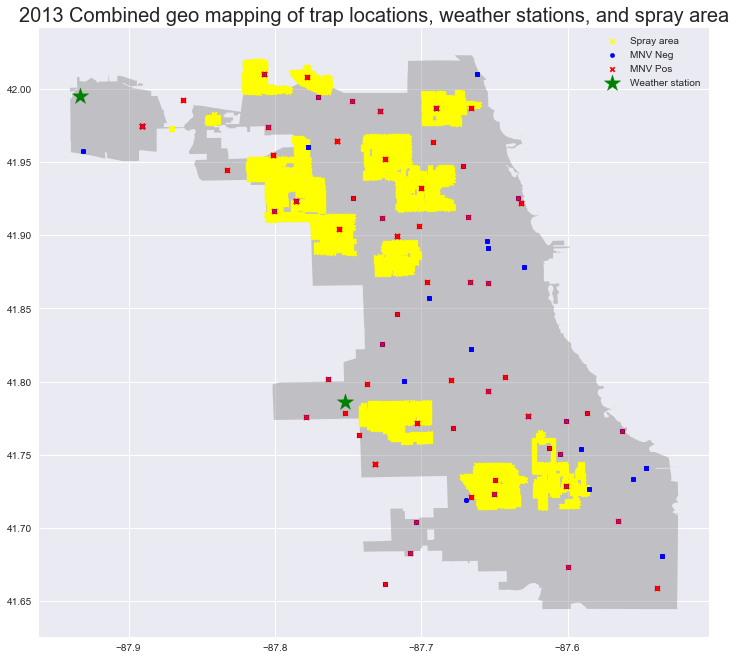

In [88]:
# Loop to plot the traps across years
for i, yr in enumerate(list(train_df['year'].unique())):
    fig, ax = plt.subplots(figsize = (12,12))
    neg_mask = (geo_df['year'] == yr) & (geo_df['wnvpresent']==0)
    pos_mask = (geo_df['year'] == yr) & (geo_df['wnvpresent']==1)
    
    street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
    if len(geo_spray[geo_spray['year']==yr]):
        geo_spray[geo_spray['year']==yr].plot(ax=ax, markersize=20, color='yellow',marker='x', label='Spray area')
    geo_df[neg_mask].plot(ax=ax, markersize=20, color='blue',marker='o', label='MNV Neg')
    geo_df[pos_mask].plot(ax=ax, markersize=20, color='red',marker='x', label='MNV Pos')
    geo_stn.plot(ax=ax, markersize=300, color='green', marker='*', label='Weather station');
    plt.title(f'{yr} Combined geo mapping of trap locations, weather stations, and spray area', fontdict={'fontsize':20})
    plt.legend();
    
# Combined geo mapping of trap locations, 2 weather stations, and spray area
# Red 'x' - 'WnrPresent' == 1
# Blue 'o' - 'WnrPresent' == 0
# Green '*' - Weather station 1 & 2
# Yellow 'x' - Spray    

There was a significant drop in the number of WNV presence found in 2009 from 2007. If we focused on the southern part of the city where the WNV presence is concentrated in 2007, this area was clear of the WNV presence in both 2009 and 2011. However, for the northern area near to station 1, they continued to show virus presence even in 2009 and 2011 where the number of cases lowered across the city. Pesticide spraying was recorded in this region in 2011 with effort to control the situation. 

In 2013, WNV presence was found in most traps across the city and the situation seemed to have worsen quite alot from 2011. The number of spraying recorded had increased 10 times in 2011 and spread across different locations in the city.

---
## EDA visualization
[top](#Contents)

In [89]:
# get list of years in train_df
train_years = list(train_df['year'].unique())
plot_dict = dict()

# split the train_df into years for plotting
for yr in train_years:
    plot_dict[yr] = train_df[train_df['date'].dt.year == yr]

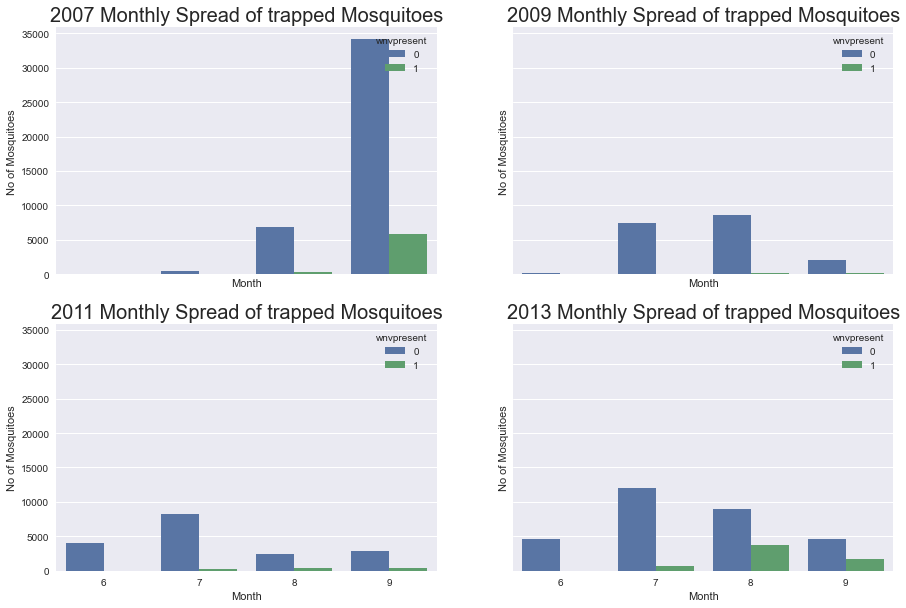

In [90]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(15,10),sharey=True,sharex=True); 
ax = ax.ravel()

for i, yr in enumerate(list(train_df['year'].unique())):
    yr_data = train_df[train_df["date"].dt.year == yr]    
    x = yr_data['date'].dt.month
    y = yr_data['nummosquitos']
    c = yr_data['wnvpresent']
    title = f'{yr} Monthly Spread of trapped Mosquitoes'
    x_lbl = ('Month')
    y_lbl = ('No of Mosquitoes')

    sns.barplot(x=x, y=y,hue=c, ax=ax[i], estimator=sum, ci=None);
    ax[i].set_title(title,fontsize=20);
    ax[i].set_xlabel(x_lbl);
    ax[i].set_ylabel(y_lbl);

From the monthly spread of trapped mosquitoes by years, the percentage of mosquitoes with WNV presence was significantly highly in August and September.

(0.0, 500.0)

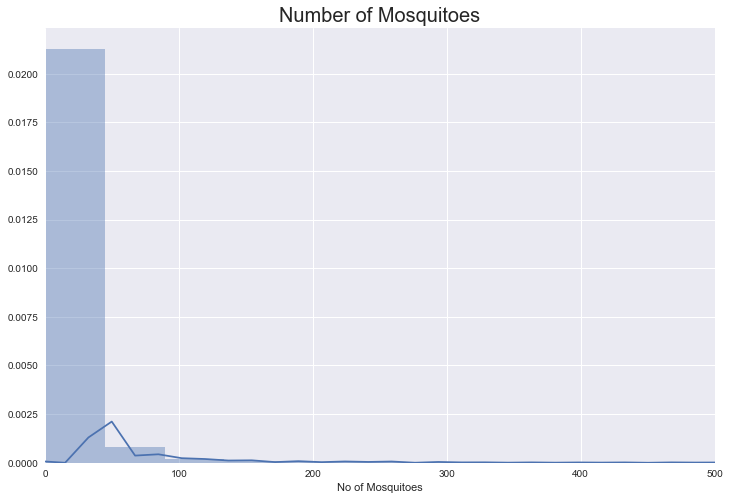

In [91]:
fig, ax = plt.subplots(figsize=(12,8));
sns.distplot(train_df['nummosquitos'], ax=ax);
ax.set_title('Number of Mosquitoes', fontsize = 20);
ax.set_xlabel('No of Mosquitoes');
ax.set_xlim(left=0, right=500)

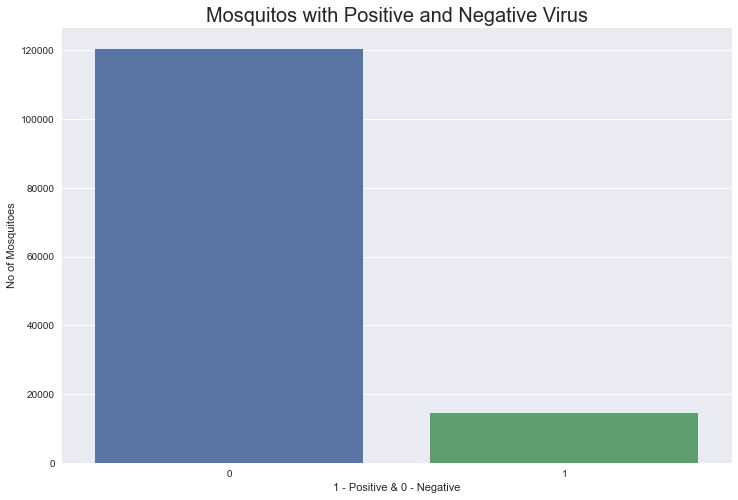

In [92]:
# Positive & Negative Mosqitos across the train dataset
fig, ax = plt.subplots(figsize=(12,8));
sns.barplot(y='nummosquitos',x='wnvpresent', data=train_df, estimator=sum, ci=None);
ax.set_title('Mosquitos with Positive and Negative Virus', fontsize = 20);
ax.set_xlabel('1 - Positive & 0 - Negative');
ax.set_ylabel('No of Mosquitoes');

Our dataset is highly imbalanced as there are much higher number of traps with no WNV presence. 

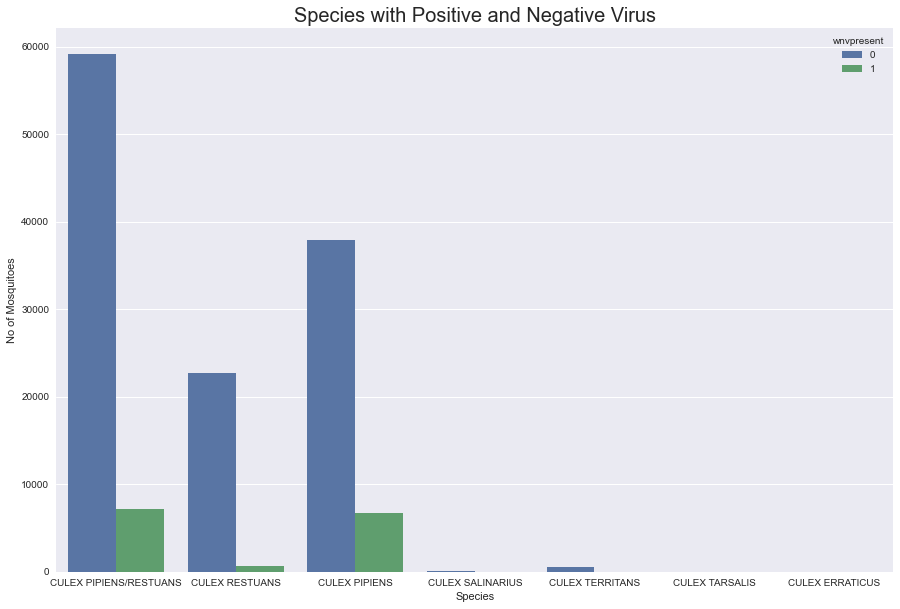

In [93]:
plt.figure(figsize=(15,10));
sns.barplot(x='species', y='nummosquitos',hue='wnvpresent', data=train_df, estimator=sum, ci=None);
plt.title('Species with Positive and Negative Virus', fontsize = 20);
plt.xlabel('Species');
plt.ylabel('No of Mosquitoes');

The types of mosquitoes carrying the WNV virus are Culex Restuans and Culex Pipiens. Traps with presence of these types of mosquitoes have a higher probability of testing positive for the virus as compared to other types of mosquitoes.

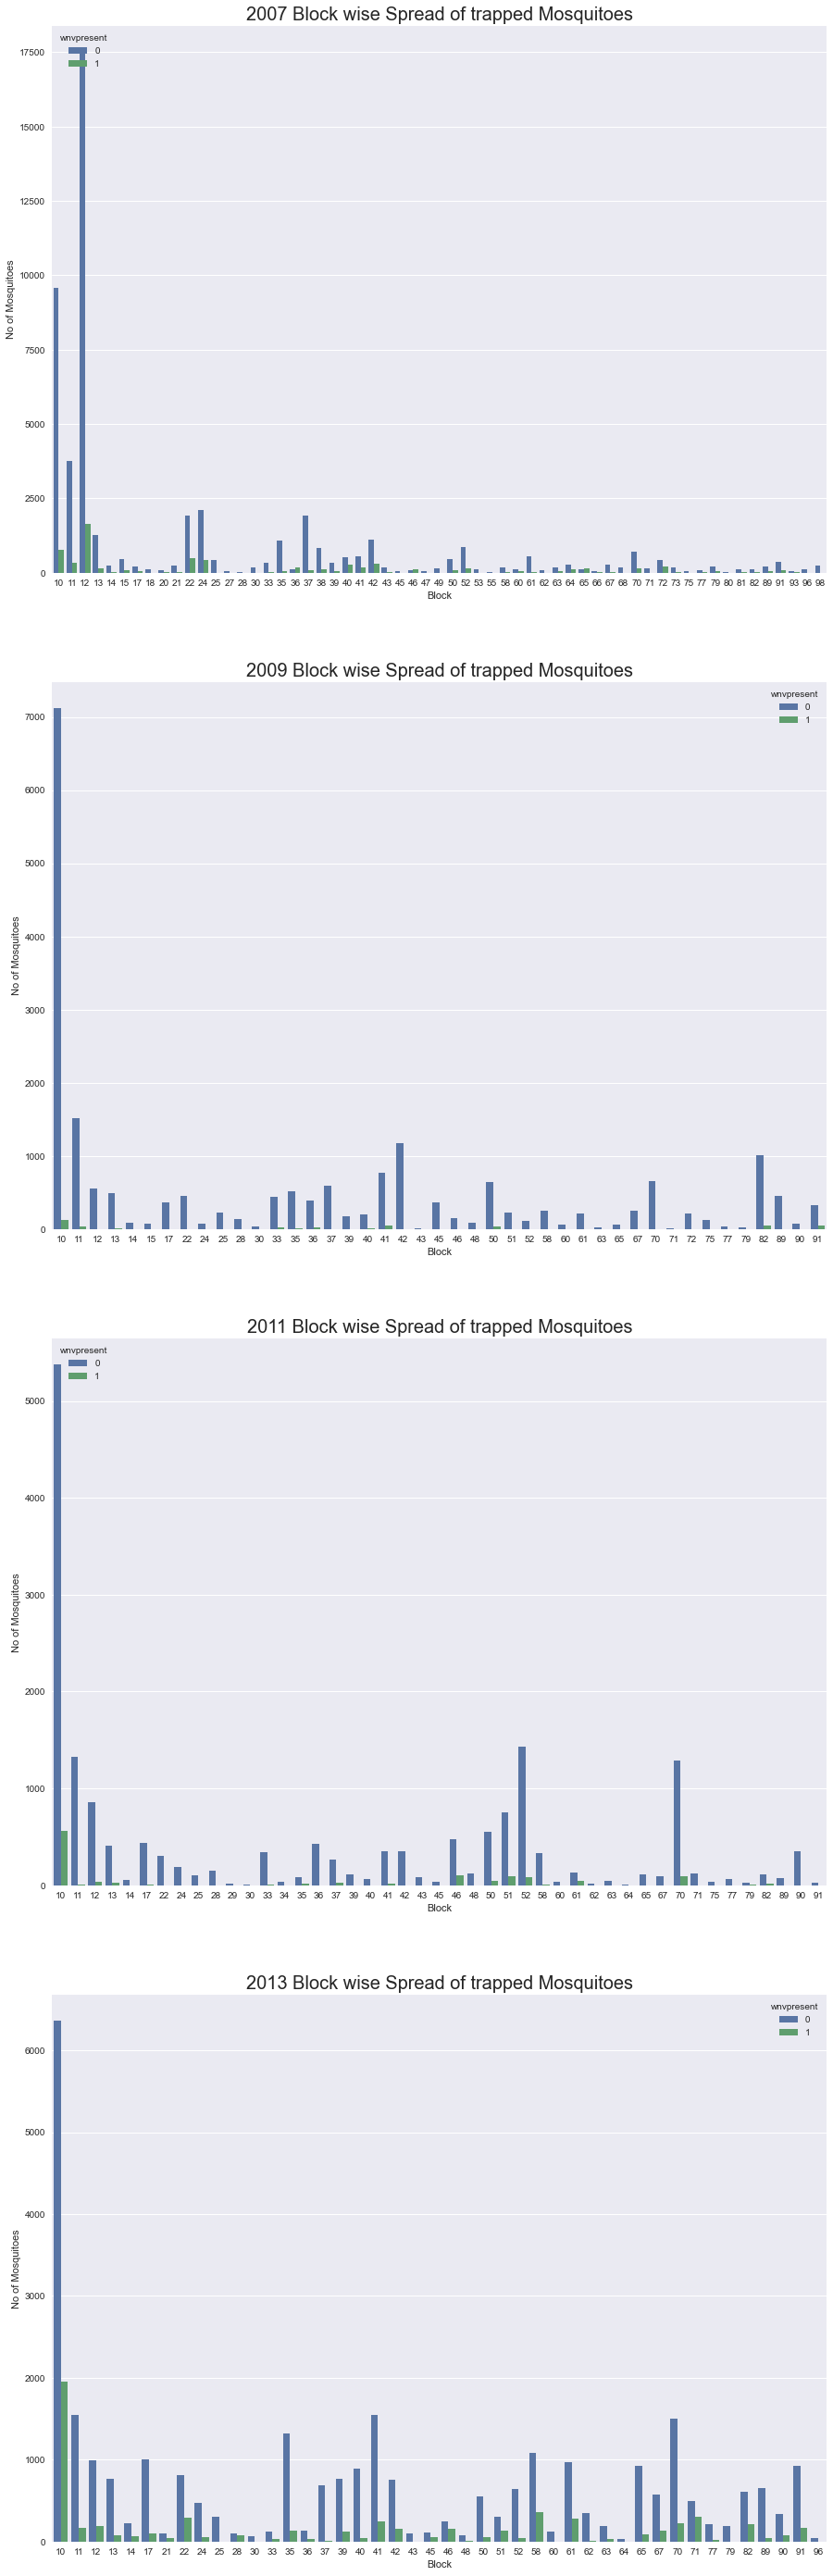

In [94]:
# plot number of mosquitos by block
fig, ax = plt.subplots(nrows=4,figsize=(15,50));
ax = ax.ravel()

for i, yr in enumerate(list(train_df['year'].unique())):
    yr_data = train_df[train_df['date'].dt.year == yr]   
    x = yr_data['block']
    y = yr_data['nummosquitos']
    c = yr_data['wnvpresent']
    title = f'{yr} Block wise Spread of trapped Mosquitoes'
    x_lbl = ('Block')
    y_lbl = ('No of Mosquitoes')
    orient = 'v'

    sns.barplot(x=x, y=y, hue=c, ax=ax[i], orient=orient, estimator=sum, ci=None);
    ax[i].set_title(title, fontsize=20);
    ax[i].set_xlabel(x_lbl);
    ax[i].set_ylabel(y_lbl);

Block 10 had the highest records of trapped mosquitoes and presence of WNV, it was highly likely that trap T009 in located in this block. We can verify and investigate this particular area later.

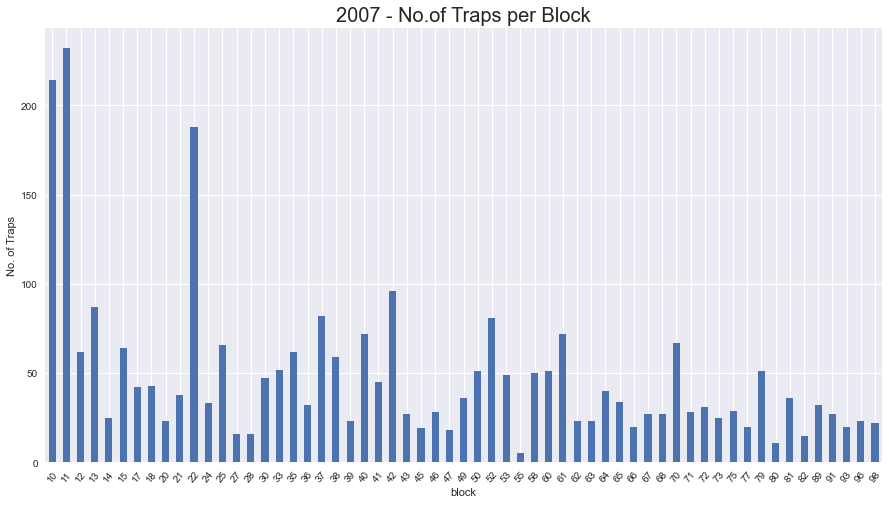

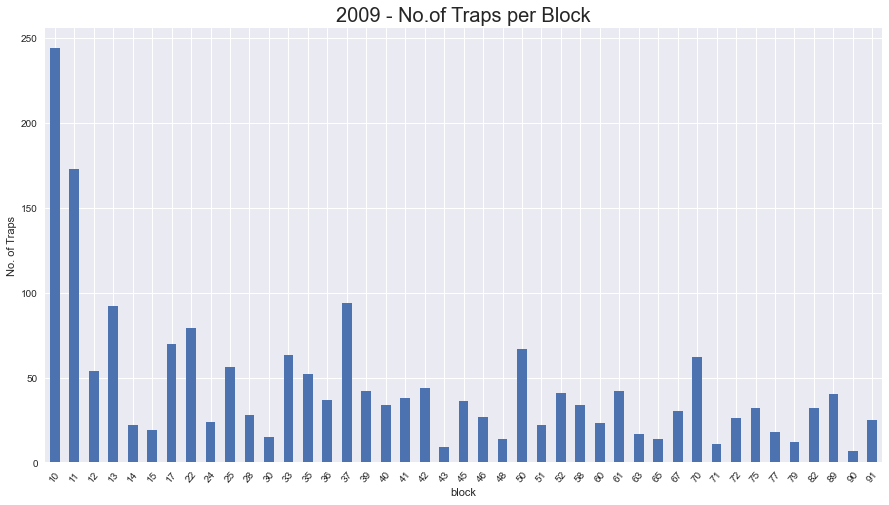

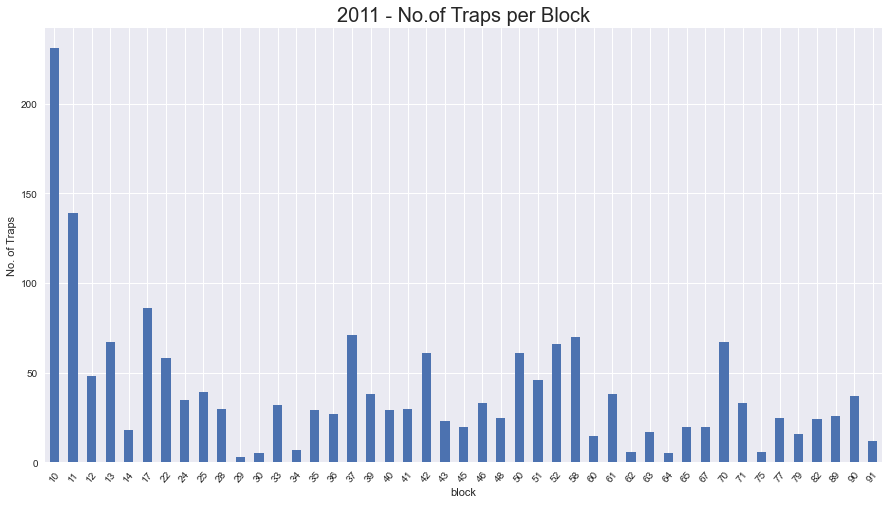

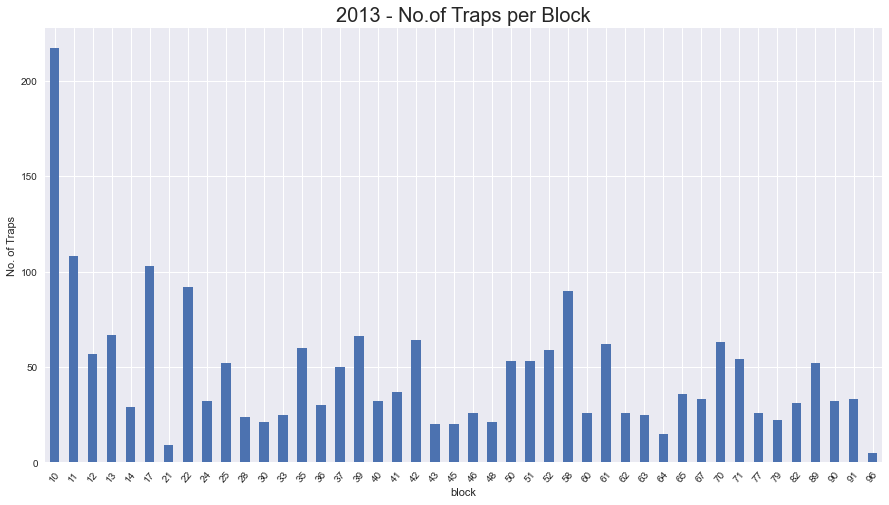

In [95]:
# plot number of traps by block
for i, yr in enumerate(list(train_df['year'].unique())):
    plt.figure(figsize=(15,8))
    plot_data = train_df.groupby(['year','block'])['trap'].count()
    plot_data[yr].plot.bar();
    plt.title(f'{yr} - No.of Traps per Block', fontsize=20);
    plt.ylabel('No. of Traps');
    plt.xticks(rotation=50);

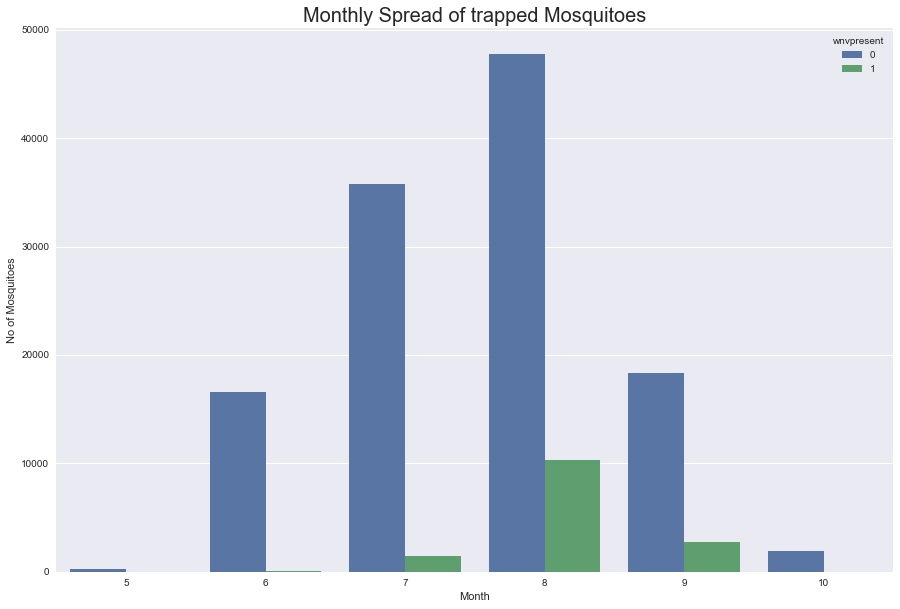

In [96]:
# Monthly trend of trapped mosquitos across all years
fig, ax = plt.subplots(figsize=(15,10));
sns.barplot(x=train_df['date'].dt.month, y='nummosquitos', hue='wnvpresent', 
            data=train_df, estimator=sum, ci=None);
ax.set_title('Monthly Spread of trapped Mosquitoes',fontsize=20);
ax.set_xlabel('Month');
ax.set_ylabel('No of Mosquitoes');

Number of mosquitoes trapped was the highest in the month of August where the weather is hot and humid. The presence of WNV was thus higher in this month as well.

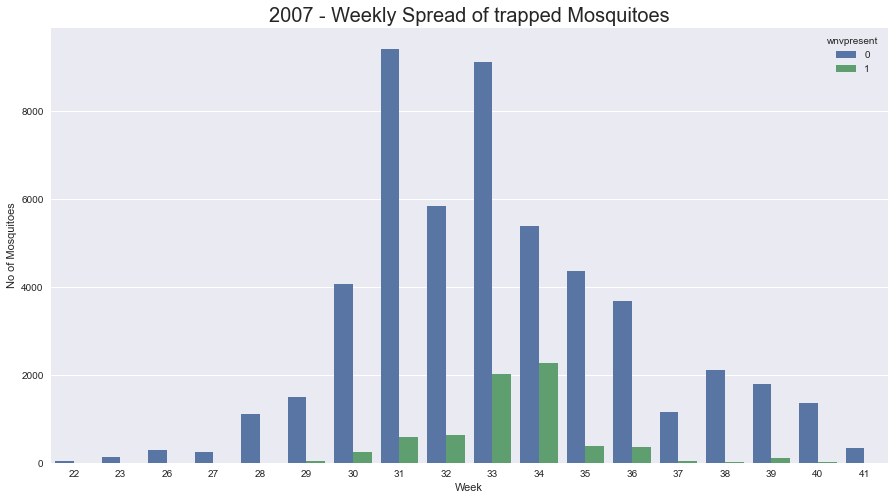

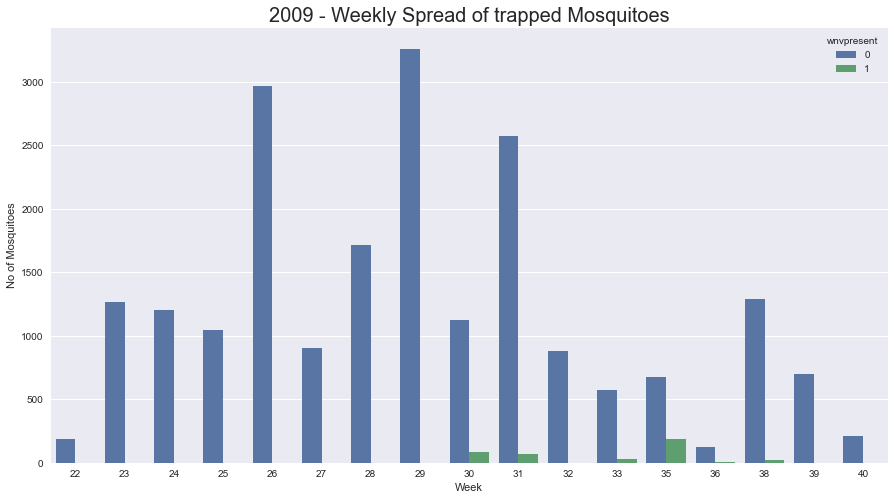

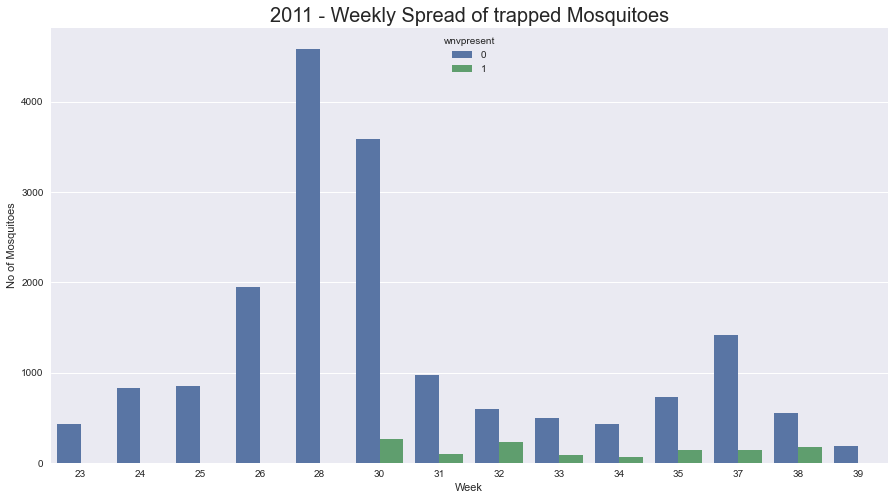

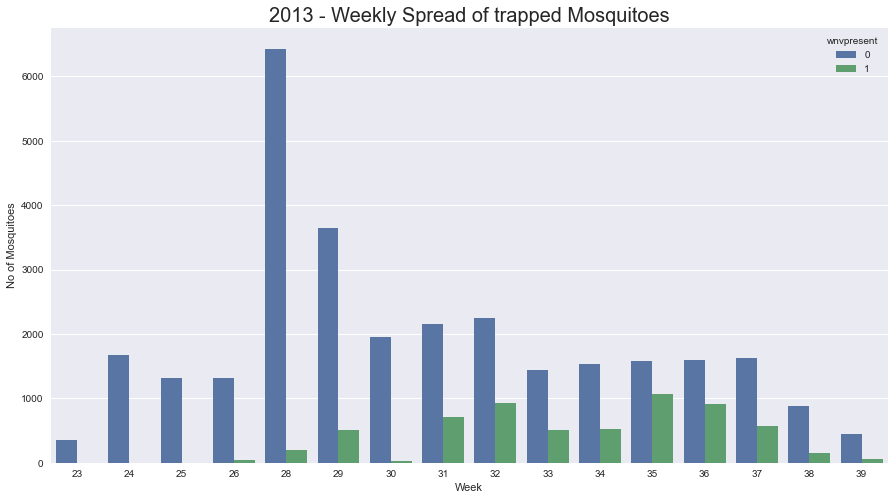

In [97]:
# plot number of mosquitos by block
for i, yr in enumerate(list(train_df['year'].unique())):
    fig, ax = plt.subplots(figsize=(15,8));
    yr_data = train_df[train_df['date'].dt.year == yr]
    sns.barplot(x=yr_data['date'].dt.week, 
                y='nummosquitos', hue='wnvpresent', data=yr_data, estimator=sum, ci=False, ax=ax);
    ax.set_title(f'{yr} - Weekly Spread of trapped Mosquitoes',fontsize=20);
    ax.set_xlabel('Week');
    ax.set_ylabel('No of Mosquitoes');
    plt.show()

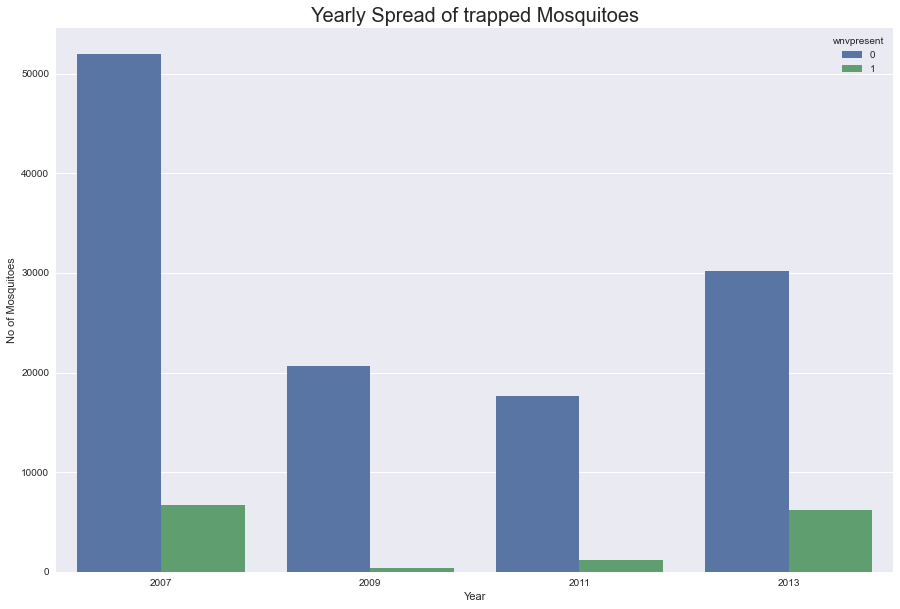

In [98]:
# Yearly trend of trapped mosquitos
fig, ax = plt.subplots(figsize=(15,10));
sns.barplot(x=train_df['date'].dt.year, y='nummosquitos', hue='wnvpresent', data=train_df, estimator=sum, ci=None);
ax.set_title('Yearly Spread of trapped Mosquitoes',fontsize=20);
ax.set_xlabel('Year');
ax.set_ylabel('No of Mosquitoes');

Even though the total number of mosquitoes caught in 2007 was higher than that of 2013, the percentage of WNV presence went up in 2013.

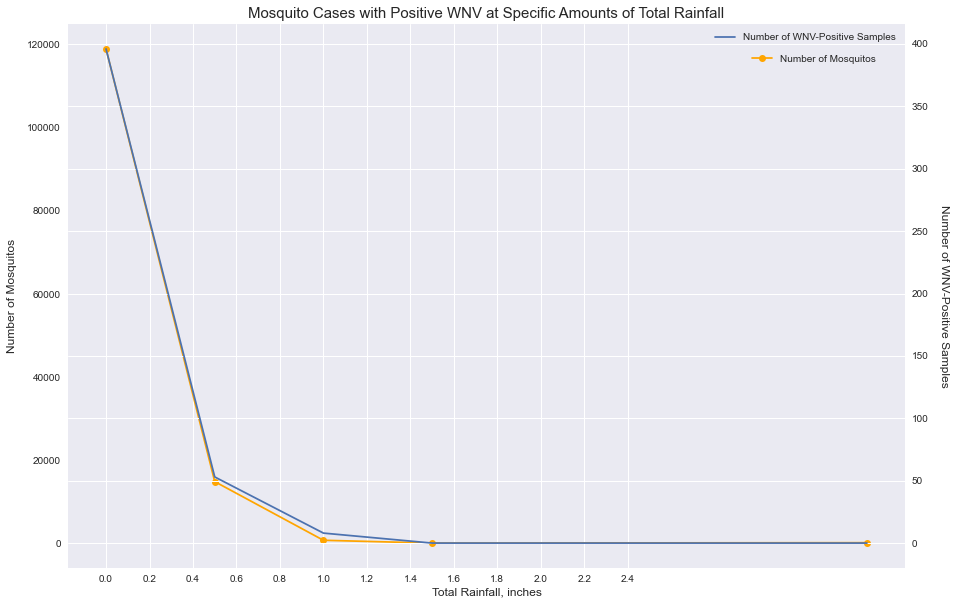

In [99]:
### Impact of Rainfall on Mosquitos Count
def plot_precip(compound):
    fig, ax = plt.subplots(figsize=(15,10))

    # Compound data to specifed scale
    temp = merged_df.groupby('preciptotal').sum()
    temp = temp.groupby(temp.index // compound).sum().reset_index()[['preciptotal', 'wnvpresent', 'nummosquitos']]
    temp.preciptotal = temp.preciptotal * compound

    # Mosquitos Count Plot
    temp.set_index('preciptotal')['nummosquitos'].plot(ax=ax, color='orange', marker='o', label='Number of Mosquitos')
    ax.set_ylabel('Number of Mosquitos', fontsize=12, labelpad=10)
    ax.legend(loc=(0.813, 0.92))
    ax.grid(axis='y')

    # WNV-Positive Traps Plot
    ax2 = ax.twinx()
    temp.set_index('preciptotal')['wnvpresent'].plot(ax=ax2, marker='x', label='Number of WNV-Positive Samples')
    ax2.set_ylabel('Number of WNV-Positive Samples', fontsize=12, labelpad=20, rotation=270)
    ax2.legend(loc=0)

    plt.xticks(np.arange(0, 2.6, 0.2))
    ax.set_xlabel('Total Rainfall, inches', fontsize=12)
    plt.title('Mosquito Cases with Positive WNV at Specific Amounts of Total Rainfall', fontsize=15)
    plt.show()

plot_precip(compound=0.5)

The above line graph shows the total rainfall (precipitation) is inversely proportionatal to both the number of mosquitos and number of WNV-positive traps. 

The numbers are significantly higher when there is no rainfall at all. Furthermore, mosquitoes still thrive at rainfall amounts less than 1.0 inch. After which, the WNV-positive trap counts fall to zero with mosquitos count start to hover around zero.

The observation of precipitation can most likely be attributed to heavy downpour washing away the mosquito larvae at higher amounts of precipitation (rainfall).

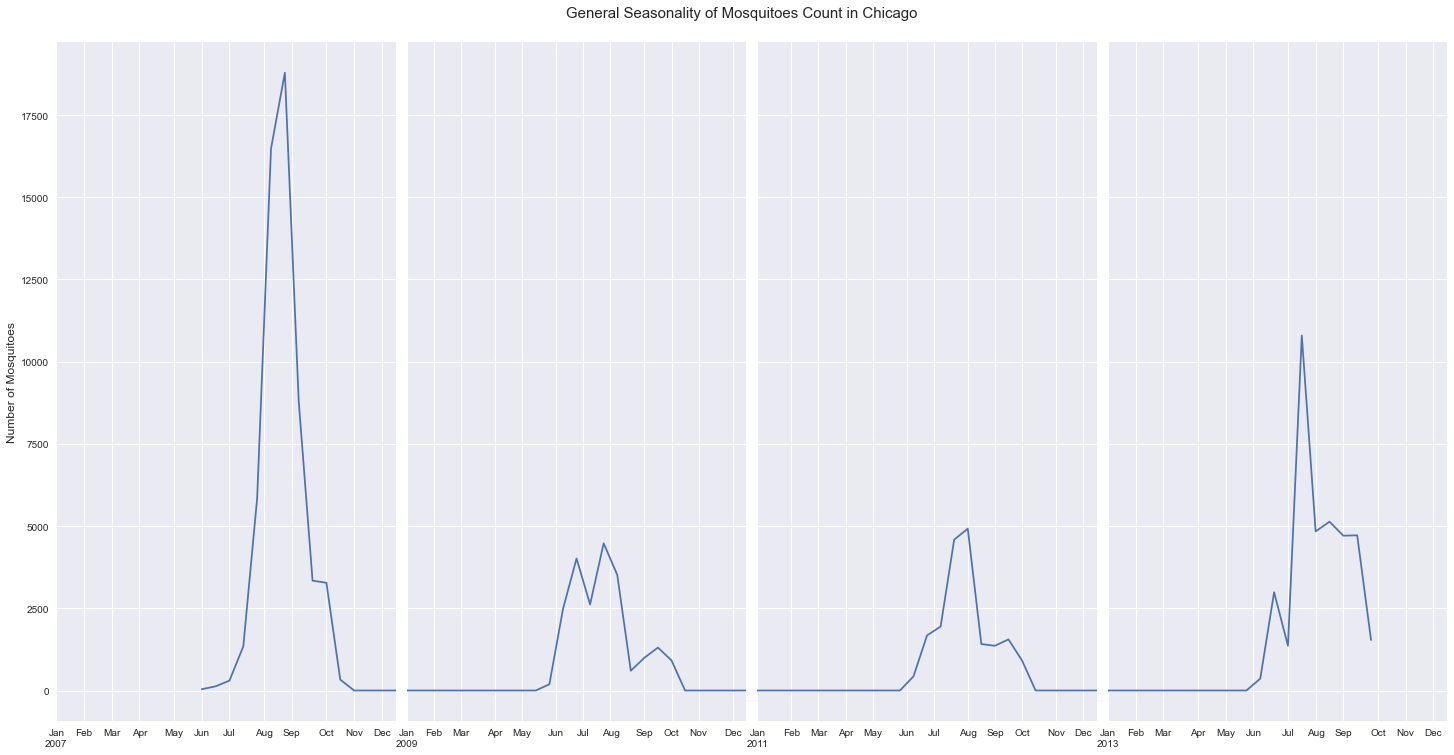

In [100]:
### Annual Seasonality of Mosquito Count in Chicago
fig, ax = plt.subplots(ncols=4, figsize=(20,10), sharey=True)

years = ['2007', '2009', '2011', '2013']

for i in range(4):
    merged_df.set_index('date').resample('2W').sum()['nummosquitos'].sort_index().plot(ax=ax[i])
    ax[i].set_xlim(years[i]+'-01', years[i]+'-12-15')
    ax[i].set_xlabel('')

# Global Setting
fig.suptitle('General Seasonality of Mosquitoes Count in Chicago', x=0.51, y=1.03, fontsize=15)
ax[0].set_ylabel('Number of Mosquitoes', fontsize=12)
plt.tight_layout(pad=0)

plt.show()

The above graph shows that the peak period where mosquitoes start to breed is the months between Jun- Oct every year, most likely following the change of seasons.

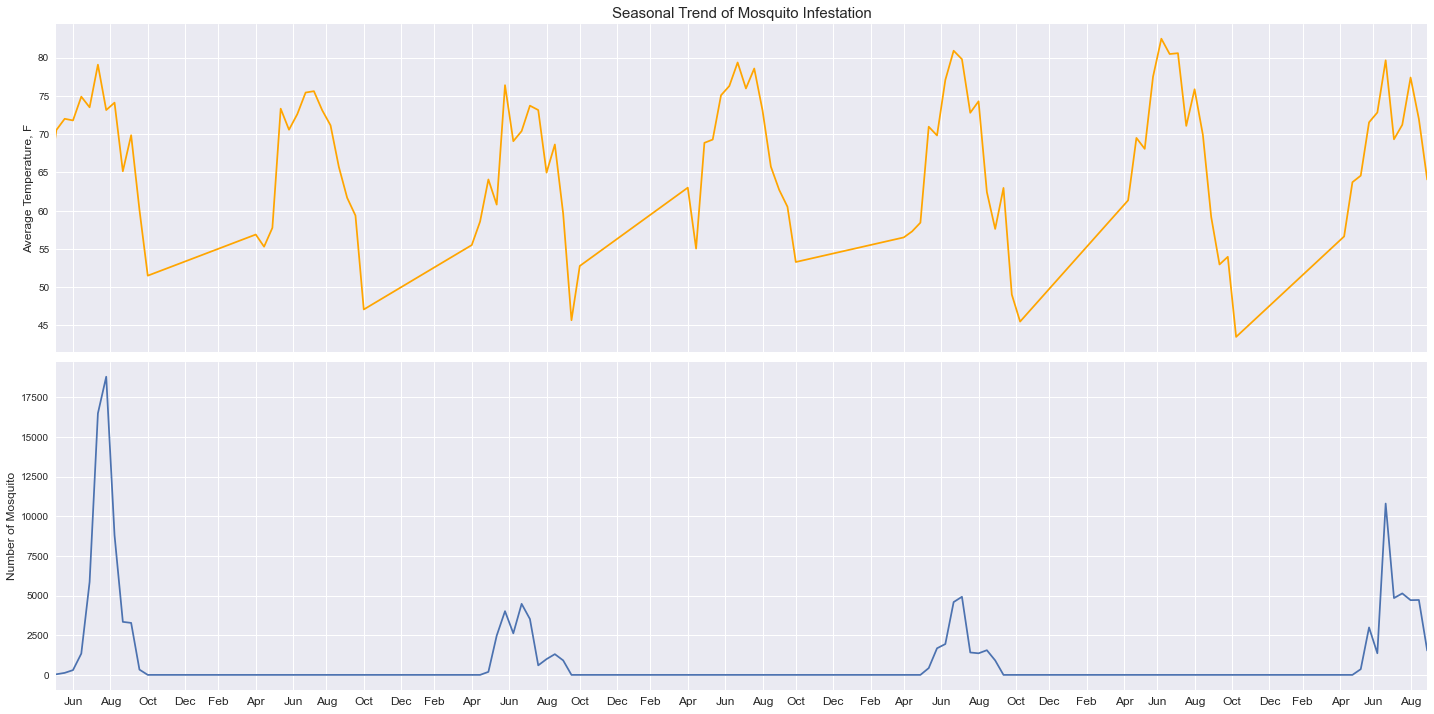

In [101]:
### Temperature Seasonality on Mosquitoes Count
fig, ax = plt.subplots(nrows=2, figsize=(20,10), sharex=True)

# Temperature resampled at 2-week Interval
w_df.resample('2W').mean()['tavg'].interpolate(method='time').plot(ax=ax[0], 
                                                                   color='orange', 
                                                                   label='Temperature')
ax[0].set_ylabel('Average Temperature, F', fontsize=12)
ax[0].tick_params(axis='x', which='minor', bottom=False)

# Number of Mosquitos
merged_df.set_index('date').resample('2W').sum()['nummosquitos'].interpolate(method='time').plot(ax=ax[1],
                                                                                             label='Mosquito Count')
ax[1].set_ylabel('Number of Mosquito', fontsize=12)

# Global Setting
ax[0].set_title('Seasonal Trend of Mosquito Infestation', fontsize=15)
ax[1].set_xlabel('')
timeframe = pd.date_range('2007-06-01', '2013-10-01', freq='2M')
plt.xticks(ticks=timeframe, labels=[x.strftime('%b') for x in timeframe], fontsize=12)

plt.tight_layout(pad=1)
plt.show()

The above graph shows that mosquitos prefer the higher temperatures as when temperature increase so does the number of mosquitoes. 

Mosquitoes data are missing for the alternate years in the training set, hence there are gaps in the trend line every 2 years.

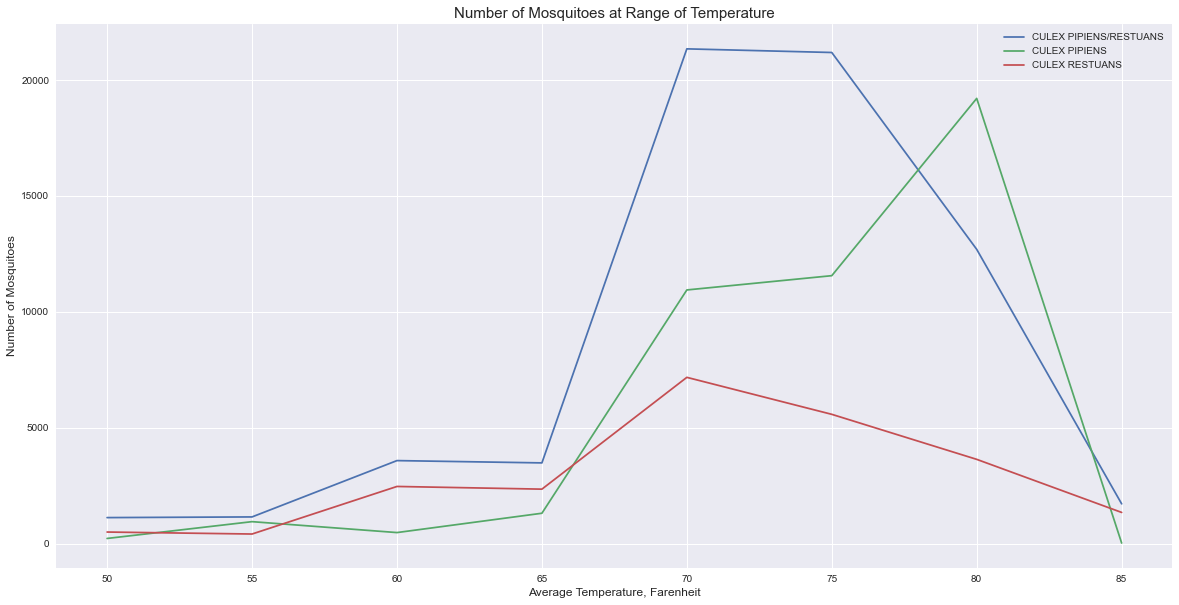

In [102]:
### Optimal Temperature for Mosquitoes Species
def plot_temperature(compound, species=None):
    fig, ax = plt.subplots(figsize=(20,10))

    if species:
        for spec in species:
            # Compound data to specifed scale
            temp = merged_df.groupby('species').get_group(spec).groupby('tavg').sum()
            temp = temp.groupby(temp.index // compound).sum().reset_index()[['tavg', 'nummosquitos']]
            temp.tavg = temp.tavg * compound
            temp.rename(columns={'nummosquitos': spec}, inplace=True)
            temp.set_index('tavg').plot(ax=ax)

    else:
        temp = merged_df.groupby('tavg').sum()
        temp = temp.groupby(temp.index // compound).sum().reset_index()[['tavg', 'nummosquitos']]
        temp.tavg = temp.tavg * compound
        temp.set_index('tavg').plot(ax=ax)
        ax.get_legend().remove()

    # Global Setting
    plt.xlabel('Average Temperature, Farenheit', fontsize=12)
    plt.ylabel('Number of Mosquitoes', fontsize=12)
    plt.title('Number of Mosquitoes at Range of Temperature', fontsize=15)
    plt.show()
    
# Plot of optimal temperature range for each species
species = ['CULEX PIPIENS/RESTUANS', 'CULEX PIPIENS', 'CULEX RESTUANS']
plot_temperature(compound=5, species=species)

The above graph shows that the top 3 WNV carrying mosquito species prefer a temperature range between 65 degrees Fahrenheit and 85 degrees Fahrenheit.

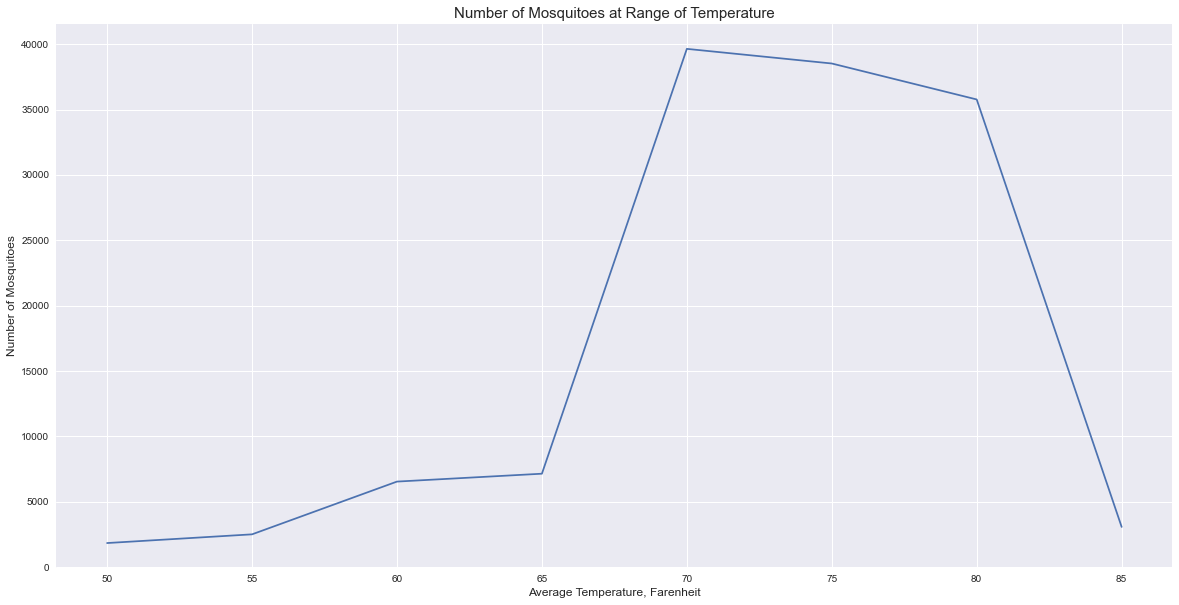

In [103]:
# Plot of optimal temperature range for all mosquitos
plot_temperature(compound=5)

---
## Feature Selection
[top](#Contents)

In [104]:
# Filtering for Numerical Columns
num_df = merged_df.drop(['date', 'latitude', 'longitude'], axis=1)
num_df =  num_df.select_dtypes(include =['float64','int64'])
num_df.shape

(8610, 46)

In [105]:
# Filtering for continuous variables
# Get the number of classes in each columns
unique_counts = num_df.apply(pd.Series.value_counts).notna().sum()

# Getting only continuous variable for correlation study
cont_cols = list(unique_counts[unique_counts>2].index)
# append target feature for correlation analysis
cont_cols.append('wnvpresent')

In [106]:
num_df = num_df[cont_cols]
num_df.head()

,block,addressaccuracy,nummosquitos,year,month,day,stn_distance,tmax,tmin,tavg,...,tmax_wk1,tmin_wk1,tavg_wk1,dewpoint_wk1,wetbulb_wk1,heat_wk1,cool_wk1,preciptotal_wk1,loc,wnvpresent
0,11,8,1,2007,5,29,12.1271,88,65,77.0,...,87.0,60.0,74.0,44.0,58.0,0.0,9.0,0.0,-3669.828863,0
1,11,8,2,2007,5,29,12.1271,88,65,77.0,...,87.0,60.0,74.0,44.0,58.0,0.0,9.0,0.0,-3669.828863,0
2,11,8,1,2007,5,29,12.0456,88,65,77.0,...,87.0,60.0,74.0,44.0,58.0,0.0,9.0,0.0,-3669.182171,0
3,11,8,1,2007,5,29,14.6551,88,65,77.0,...,87.0,60.0,74.0,44.0,58.0,0.0,9.0,0.0,-3672.428319,0
4,15,8,1,2007,5,29,13.5506,88,65,77.0,...,87.0,60.0,74.0,44.0,58.0,0.0,9.0,0.0,-3677.852055,0


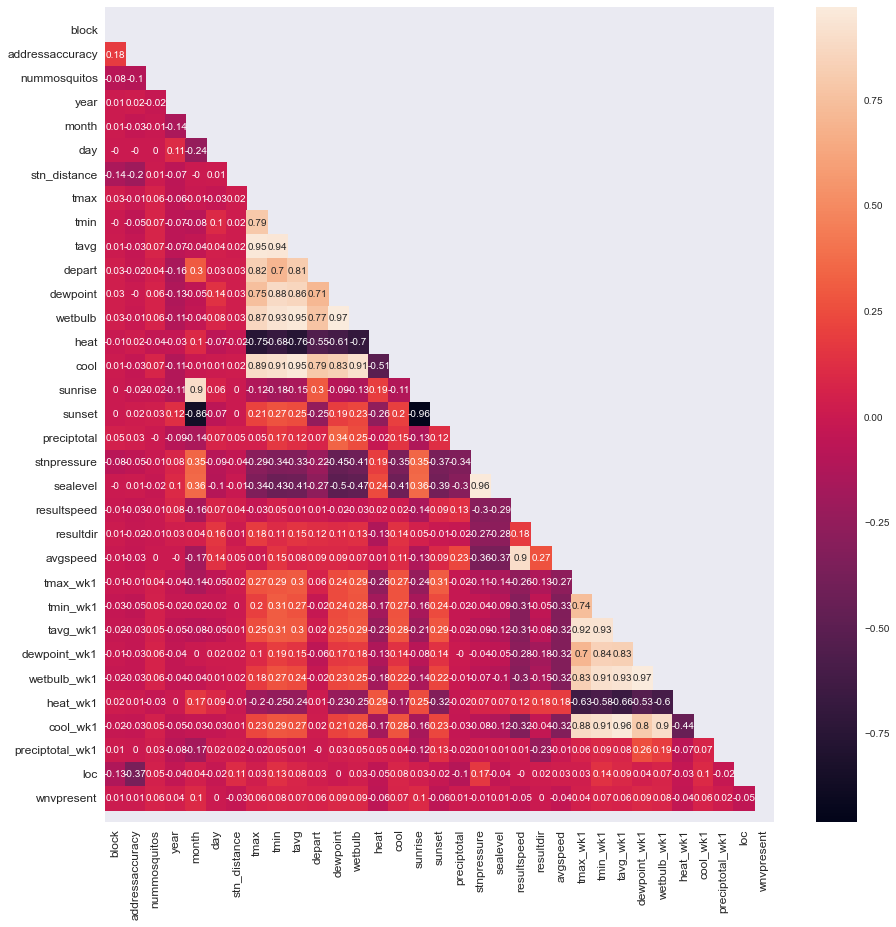

In [107]:
# Plot heat map for all numerical variables in train 
corr=round(num_df.corr(),2)
fix, ax = plt.subplots(figsize=(15,15))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
ax = sns.heatmap(corr,mask=mask, ax=ax, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, va="center")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top -0.5)

plt.show()

In [108]:
# Loop to remove any collinear variable
correlated_features = set()

# Collinearity threshold here is set at 0.9
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.9:
            colname = corr.columns[i]
            correlated_features.add(colname)

print("Collinear Columns to drop: ", correlated_features)

Collinear Columns to drop:  {'wetbulb', 'sunset', 'sealevel', 'tavg_wk1', 'tavg', 'cool_wk1', 'wetbulb_wk1', 'cool'}


---
After EDA and feature analysis, we have narrowed down to these 6 columns from the original dataset, 'depart', 'sunrise', 'stnpressure', 'resultspeed', 'resultdir', 'avgspeed'. 
The other features in the list are:
- Interaction term of latitude * longitude ['loc']
- One hot encoding of the weather codesum ['cs_tsra', 'cs_ts', 'cs_dz', 'cs_na', 'cs_vcts', 'cs_hz', 'cs_br', 'cs_ra']
- One hot encoding of species that are carrier of WNV ['s_cpr', 's_cp', 's_cr']
- time lagged features ['tmax_wk1', 'tmin_wk1', 'dewpoint_wk1', 'wetbulb_wk1', 'heat_wk1', 'preciptotal_wk1']

In [109]:
# Final set of features
features = ['depart', 'sunrise', 'stnpressure', 'resultspeed', 
            'resultdir', 'avgspeed', 'loc', 'cs_tsra', 'cs_ts', 
            'cs_dz', 'cs_na', 'cs_vcts', 'cs_hz', 'cs_br', 'cs_ra',
            's_cpr', 's_cp', 's_cr', 'tmax_wk1', 'tmin_wk1',
            'dewpoint_wk1', 'wetbulb_wk1', 'heat_wk1', 'preciptotal_wk1']

In [110]:
len(features)

24

---
## Modelling
[top](#Contents)

In [111]:
# preparing the features for modelling
X = merged_df[features]
y = merged_df['wnvpresent']

In [112]:
# define constants for modelling
RS = 42 # random state
CV = 5 # cross val
SCORE = 'roc_auc' # scoring 

In [113]:
kf = KFold(n_splits=CV, random_state=RS, shuffle=True)

In [114]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RS, stratify=y)

In [115]:
# dictionary to hold the metrics for each runs
metrics = {}
# dictionary to hold the models for each runs
models = {}
# Dataframe to hold the predictions for validataion set
val_preds_df = X_test.copy()

In [116]:
# Imbalance class for target feature
merged_df['wnvpresent'].value_counts(normalize=True)

0    0.946922
1    0.053078
Name: wnvpresent, dtype: float64

#### SMOTE
Our negative class of 'wnvpresent' makes up of about 94.7% of our data, which means majority of our traps was tested negative for West Nile Virus. We only have about 5.3% out of 8610 testings that gave us a positive result for the presence of virus. Since our data set is highly imbalanced, we will need to apply Synthetic Minority Over-sampling Technique (SMOTE) to create over-sampling of minority class.

In [117]:
sm = SMOTE(random_state=RS)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [118]:
# after SMOTE()
y_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: wnvpresent, dtype: float64

In [119]:
# Function to fit and collect model metrics
def model_metrics(tag, pipe, param, X_tr, X_ts, y_tr, y_ts, models, preds_df):
    """ 
    Function to fit and collect model metrics
  
    Parameters: 
        tag (str): name for this pipeline
        pipe (pipeline): pipeline to be executed
		param (dict): dictionary of parameters to be used
        X_tr (Series): Series holding the train feature
        X_ts (Series): Series holding the test feature
        y_tr (Series): Series holding the train target
        y_ts (Series): Series holding the test target
  
    Returns: 
		None:
  
    """
    gs = GridSearchCV(pipe, param_grid=param, cv=kf, scoring=SCORE)
    gs.fit(X_tr, y_tr)
    bm = gs.best_estimator_
    models[tag] = gs
    y_pred = bm.predict(X_ts)
    preds_df[tag]=y_pred
    print(f'{tag}->Best params: {gs.best_params_}')
    
    metric = {}
    metric['01 Train score'] = f'{bm.score(X_tr, y_tr):,.4f}'
    metric['02 Test score'] = f'{bm.score(X_ts, y_ts):,.4f}'
    metric['03 Score diff'] = float(metric['01 Train score'])-float(metric['02 Test score'])
    metric['04 Train recall'] = f'{recall_score(y_tr, bm.predict(X_tr)):,.4f}'
    metric['05 Test recall'] = f'{recall_score(y_ts, y_pred):,.4f}'

    # calculate Specificity and Sensitivity
    tn, fp, fn, tp = confusion_matrix(y_ts, y_pred).ravel()
    metric['06 Precision'] = f'{(tp /(tp + fp)):.4f}'
    metric['07 Specificity'] = f'{(tn / (tn + fp)):.4f}'
    metric['08 Sensitivity'] = f'{(tp / (tp + fn)):.4f}'
    metric['09 True Negatives'] = tn
    metric['10 False Positives'] = fp
    metric['11 False Negatives'] = fn
    metric['12 True Positives'] = tp
    metric['13 Train ROC Score'] = f'{roc_auc_score(y_tr, bm.predict_proba(X_tr)[:,1]):,.4f}'
    metric['14 Test ROC Score'] = f'{roc_auc_score(y_ts, bm.predict_proba(X_ts)[:,1]):,.4f}'
    metric['15 Train CV Score'] = f'{cross_val_score(bm, X_tr, y_tr, cv=CV).mean():,.4f}'
    metric['16 Test CV Score'] = f'{cross_val_score(bm, X_ts, y_ts, cv=CV).mean():,.4f}'

    # plot roc and confusion matrix
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    plot_roc_curve(gs, X_ts, y_ts, name=tag, ax=ax[0]);
    # Plot baseline. (Perfect overlap between the two populations.)
    ax[0].plot(np.linspace(0, 1, 200), np.linspace(0, 1, 200),
             label='baseline', linestyle='--')
    plot_confusion_matrix(gs, X_ts, y_ts, ax=ax[1], cmap='RdPu');
    ax[0].set_title(f'ROC for {tag}');
    ax[1].set_title(f'Confusion Matrix for {tag}');
    
    return metric

---
### Logistic Regression
Logistic regression is a regression analysis used when the dependent variable is binary.  Like all regression analyses, the logistic regression is a predictive analysis. It will predict continuous probabilities between 0 and 1.

In [120]:
# Creating a pipeline model for StandardScaler, SMOTE and Logistic Regression
lr_pipe = Pipeline([
        ('ss', StandardScaler()),
        ('lr', LogisticRegression(random_state=RS, max_iter=5000))
    ])
# Paramters
lr_params = {'lr__C': np.linspace(0.1, 1, 20)}

log_reg->Best params: {'lr__C': 0.1473684210526316}


,log_reg
01 Train score,0.7732
02 Test score,0.7909
03 Score diff,-0.0177
04 Train recall,0.7401
05 Test recall,0.4565
06 Precision,0.1193
07 Specificity,0.8098
08 Sensitivity,0.4565
09 True Negatives,660
10 False Positives,155


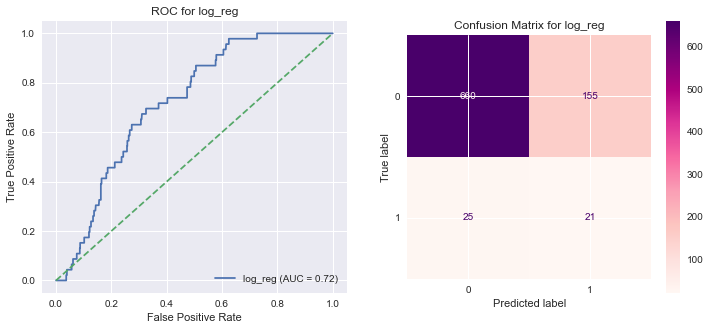

In [121]:
metrics['log_reg'] = model_metrics('log_reg', lr_pipe, lr_params, X_train, X_test, 
                                   y_train, y_test, models, val_preds_df)
pd.DataFrame(metrics)

---
### PCA and Logistic Regression
Principal components (PCs) are estimated from the predictor variables provided as input data. The individual coordinates in the selected PCs are then used as predictors in the logistic regression.

In [122]:
# Creating a pipeline model for StandardScaler, SMOTE, PCA and Logistic Regression
pca_pipe = Pipeline([
        ('ss', StandardScaler()),
        ('pca', PCA()),
        ('lr', LogisticRegression(random_state=RS, max_iter=5000))
    ])
# Paramters
pca_params = {
    'pca__n_components': [0.1, 0.25, 0.5, 0.75, 1],
    'pca__tol': [0.5, 0.75, 1],
    'lr__C': np.linspace(0.1, 1, 10),
}

log_reg_pca->Best params: {'lr__C': 0.1, 'pca__n_components': 0.75, 'pca__tol': 0.5}


,log_reg,log_reg_pca
01 Train score,0.7732,0.6486
02 Test score,0.7909,0.5923
03 Score diff,-0.0177,0.0563
04 Train recall,0.7401,0.6875
05 Test recall,0.4565,0.7391
06 Precision,0.1193,0.0912
07 Specificity,0.8098,0.5840
08 Sensitivity,0.4565,0.7391
09 True Negatives,660,476
10 False Positives,155,339


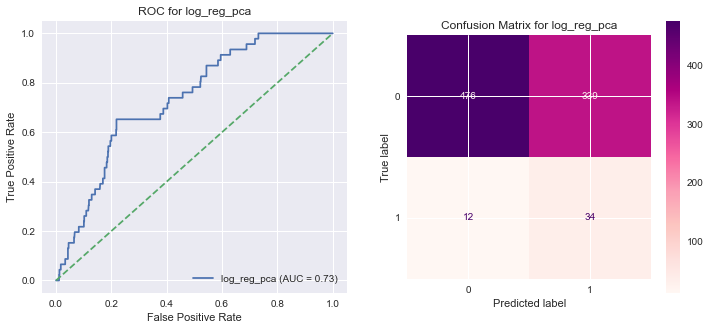

In [123]:
metrics['log_reg_pca'] = model_metrics('log_reg_pca', pca_pipe, pca_params, X_train, X_test, 
                                       y_train, y_test, models, val_preds_df)
pd.DataFrame(metrics)

---
### Extra Trees
Extra Trees is an ensemble machine learning algorithm that combines the predictions from many decision trees. It is related to the widely used random forest algorithm. It can often achieve as-good or better performance than the random forest algorithm, although it uses a simpler algorithm to construct the decision trees used as members of the ensemble. It is also easy to use given that it has a few key hyperparameters and sensible heuristics for configuring these hyperparameters.

In [124]:
# Creating a pipeline model for StandardScaler, SMOTE and Extra Trees
et_pipe = Pipeline([
        ('ss', StandardScaler()),
        ('et', ExtraTreesClassifier(random_state=RS, n_jobs=-1))
    ])
# Parameters
et_params = {'et__n_estimators': [500],
             'et__min_samples_split': [2],
             'et__min_samples_leaf': [5],
             'et__ccp_alpha': [0]}

extra_trees->Best params: {'et__ccp_alpha': 0, 'et__min_samples_leaf': 5, 'et__min_samples_split': 2, 'et__n_estimators': 500}


,log_reg,log_reg_pca,extra_trees
01 Train score,0.7732,0.6486,0.9038
02 Test score,0.7909,0.5923,0.8281
03 Score diff,-0.0177,0.0563,0.0757
04 Train recall,0.7401,0.6875,0.9452
05 Test recall,0.4565,0.7391,0.4783
06 Precision,0.1193,0.0912,0.1507
07 Specificity,0.8098,0.5840,0.8479
08 Sensitivity,0.4565,0.7391,0.4783
09 True Negatives,660,476,691
10 False Positives,155,339,124


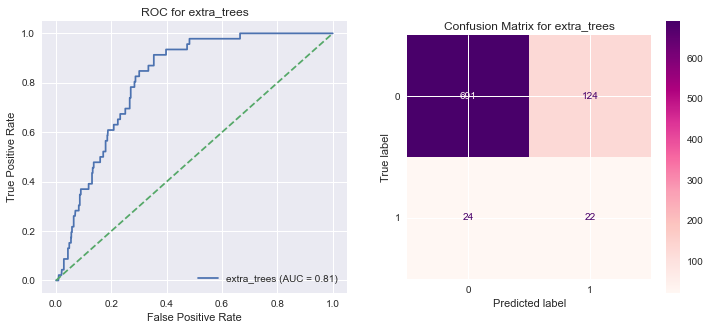

In [125]:
metrics['extra_trees'] = model_metrics('extra_trees', et_pipe, et_params, X_train, X_test, 
                                       y_train, y_test, models, val_preds_df)
pd.DataFrame(metrics)

---
### XGBoost
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. It is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.
Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. XGBoost, being an ensemble learning method, offers a systematic solution to combine the predictive power of multiple learners. The result is a single model which gives the aggregated output from several models.

In [126]:
# Creating a pipeline model for StandardScaler, SMOTE and XGBoost
xgb_pipe = Pipeline([
        ('ss', StandardScaler()),
        ('xgb', XGBClassifier(random_state=RS, 
                              objective= 'binary:logistic', 
                              verbosity=1, n_jobs=-1))
    ])
# Parameters
xgb_params = {  'xgb__learning_rate': [0.1],
                'xgb__max_depth': [3],
                'xgb__min_child_weight': [5],
                'xgb__gamma': [0.4, 0.6, 0.8],
                'xgb__subsample': [0.8],
                'xgb__scale_pos_weight': [1],
                'xgb__n_estimators': [200]}

xgboost->Best params: {'xgb__gamma': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__min_child_weight': 5, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 1, 'xgb__subsample': 0.8}


,log_reg,log_reg_pca,extra_trees,xgboost
01 Train score,0.7732,0.6486,0.9038,0.9045
02 Test score,0.7909,0.5923,0.8281,0.8386
03 Score diff,-0.0177,0.0563,0.0757,0.0659
04 Train recall,0.7401,0.6875,0.9452,0.9426
05 Test recall,0.4565,0.7391,0.4783,0.5652
06 Precision,0.1193,0.0912,0.1507,0.1793
07 Specificity,0.8098,0.5840,0.8479,0.8540
08 Sensitivity,0.4565,0.7391,0.4783,0.5652
09 True Negatives,660,476,691,696
10 False Positives,155,339,124,119


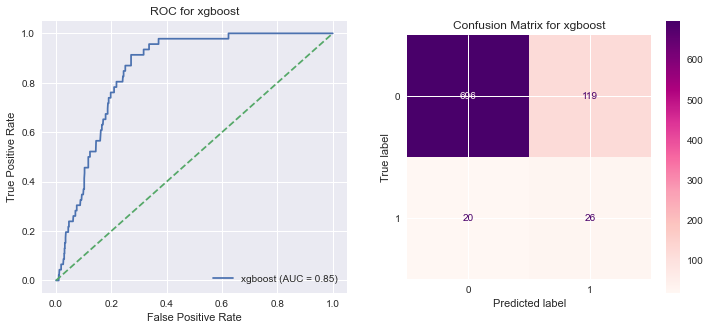

In [127]:
metrics['xgboost'] = model_metrics('xgboost', xgb_pipe, xgb_params, X_train, X_test, 
                                   y_train, y_test, models, val_preds_df)
pd.DataFrame(metrics)

---
### Random Forest
The Random Forest Classifier is a set of decision trees from a randomly selected subset of the training set. It aggregates the votes from different decision trees to decide the final class of the test object.
The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science terms, the reason that the random forest model works so well is that a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

In [128]:
# Creating a pipeline model for StandardScaler, SMOTE and Random Forest
rf_pipe = Pipeline([
        ('ss', StandardScaler()),
        ('rf', RandomForestClassifier(random_state=RS))
    ])
# Paratmeters
rf_params = {
    'rf__max_depth': [None, 3],
    'rf__n_estimators': [150, 200]
}

random_forest->Best params: {'rf__max_depth': None, 'rf__n_estimators': 200}


,log_reg,log_reg_pca,extra_trees,xgboost,random_forest
01 Train score,0.7732,0.6486,0.9038,0.9045,0.9919
02 Test score,0.7909,0.5923,0.8281,0.8386,0.8699
03 Score diff,-0.0177,0.0563,0.0757,0.0659,0.122
04 Train recall,0.7401,0.6875,0.9452,0.9426,0.9932
05 Test recall,0.4565,0.7391,0.4783,0.5652,0.2391
06 Precision,0.1193,0.0912,0.1507,0.1793,0.1250
07 Specificity,0.8098,0.5840,0.8479,0.8540,0.9055
08 Sensitivity,0.4565,0.7391,0.4783,0.5652,0.2391
09 True Negatives,660,476,691,696,738
10 False Positives,155,339,124,119,77


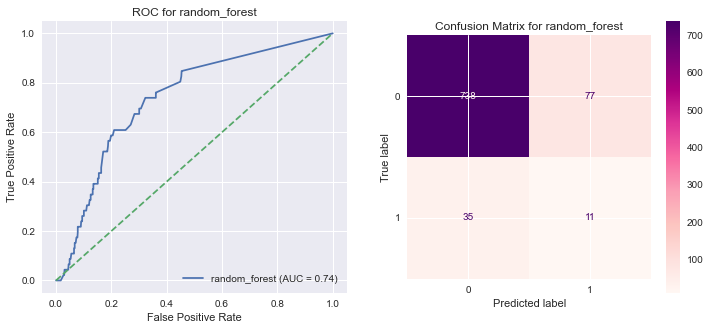

In [129]:
metrics['random_forest'] = model_metrics('random_forest', rf_pipe, rf_params, X_train, X_test, 
                                         y_train, y_test, models, val_preds_df)
pd.DataFrame(metrics)

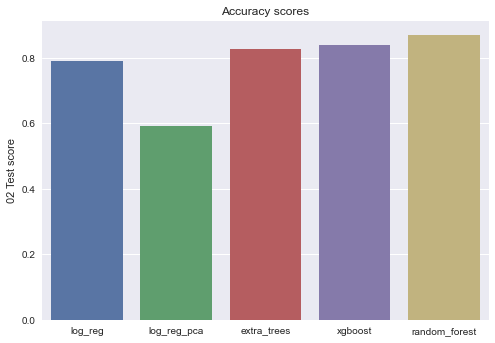

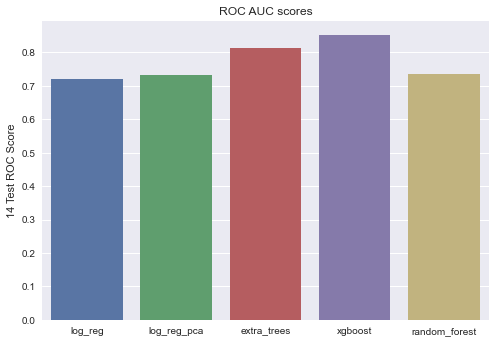

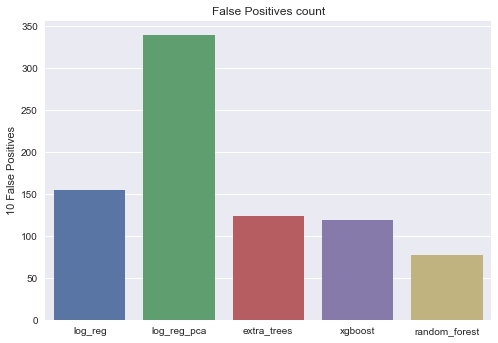

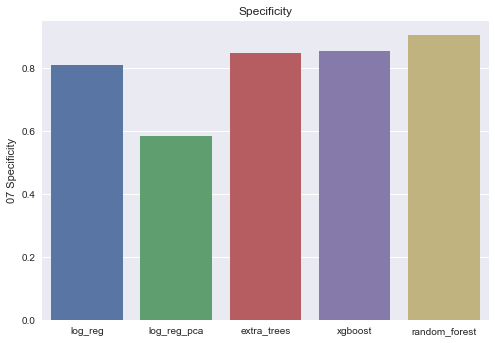

In [130]:
metrics_df = pd.DataFrame(metrics).T
metrics_df['02 Test score'] = metrics_df['02 Test score'].astype('float')
metrics_df['10 False Positives'] = metrics_df['10 False Positives'].astype('int')
metrics_df['14 Test ROC Score'] = metrics_df['14 Test ROC Score'].astype('float')
metrics_df['07 Specificity'] = metrics_df['07 Specificity'].astype('float')
sns.barplot(x=metrics_df.index, y='02 Test score', data=metrics_df, ci=None);
plt.title('Accuracy scores')
plt.show();
sns.barplot(x=metrics_df.index, y='14 Test ROC Score', data=metrics_df, ci=None);
plt.title('ROC AUC scores');
plt.show();
sns.barplot(x=metrics_df.index, y='10 False Positives', data=metrics_df, ci=None);
plt.title('False Positives count');
plt.show();
sns.barplot(x=metrics_df.index, y='07 Specificity', data=metrics_df, ci=None);
plt.title('Specificity');

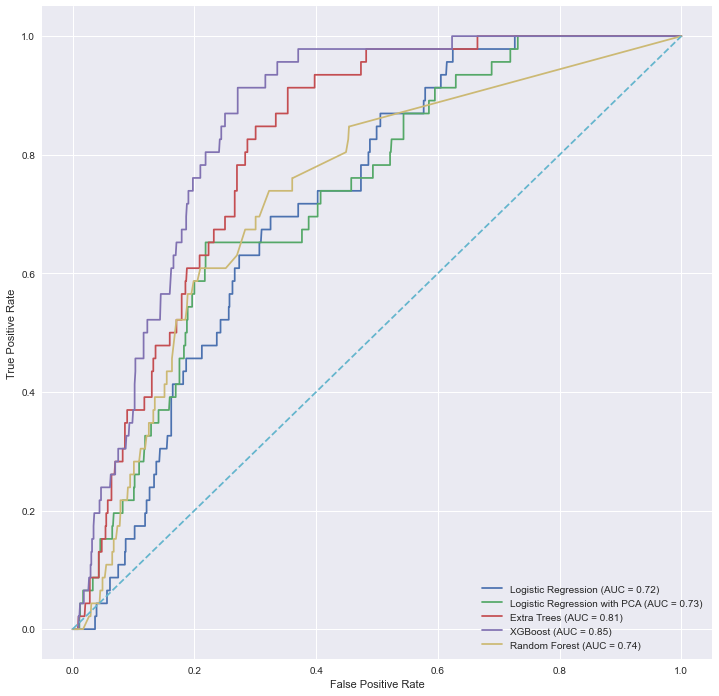

In [131]:
# Combine chart of ROC/AUC
fig, ax = plt.subplots(figsize=(12,12));
lr_plot = plot_roc_curve(models['log_reg'].best_estimator_, X_test, y_test, name='Logistic Regression',ax=ax);
pca_plot = plot_roc_curve(models['log_reg_pca'].best_estimator_, X_test, y_test, name='Logistic Regression with PCA',ax=ax);
et_plot = plot_roc_curve(models['extra_trees'].best_estimator_, X_test, y_test, name='Extra Trees', ax=ax);
xgb_plot = plot_roc_curve(models['xgboost'].best_estimator_, X_test, y_test, name='XGBoost', ax=ax);
rf_plot = plot_roc_curve(models['random_forest'].best_estimator_, X_test, y_test, name='Random Forest', ax=ax);
plt.plot(np.linspace(0, 1, 200), np.linspace(0, 1, 200), label='baseline', linestyle='--');

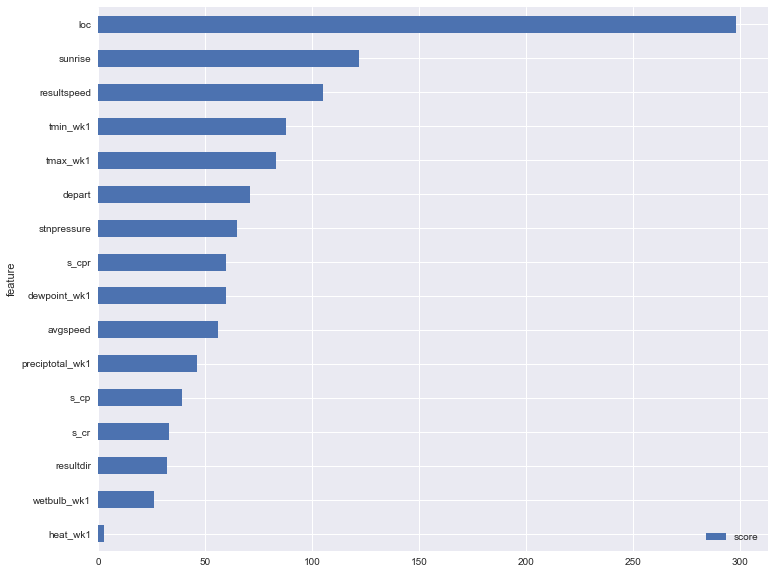

In [132]:
# Plotting the features influencing XGBoost prediction
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dtrain.feature_names

# Mapping Feature Names to F Score Values
mapper = {'f{0}'.format(i): v for i, v in enumerate(dtrain.feature_names)}
xgb_m=models['xgboost'].best_estimator_['xgb']
mapped = {mapper[k]: v for k, v in xgb_m.get_booster().get_score(importance_type='weight').items()}

map_df = pd.DataFrame(mapped.items(), columns=['feature','score'])
map_df = map_df.sort_values('score', ascending=False)[:30]
map_df.sort_values(by='score').plot(x='feature', kind='barh', figsize=(12,10));

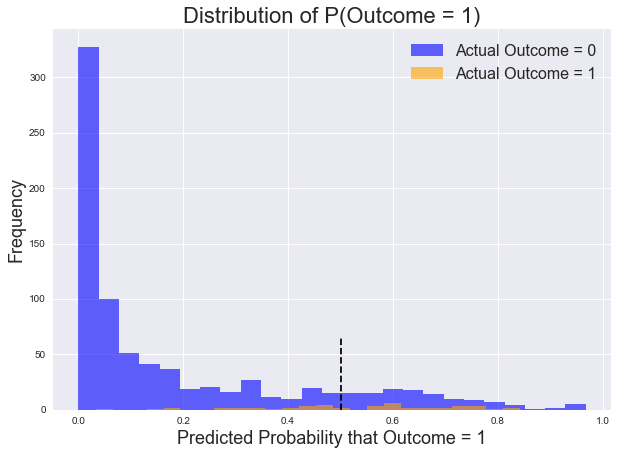

In [133]:
# Plotting the Predict Proba
xgb_model = models['xgboost'].best_estimator_
summary_df = pd.DataFrame(columns=['Model Type','Description','Accuracy','ROC_AUC'],index=None)
# preparing the predict proba
pred_proba = list(xgb_model.predict_proba(X_test)[:,1])
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
roc_score = roc_auc_score(y_test, pred_proba)
# store accuracy and roc_auc scores to summary dataframe.
summary_df = summary_df.append({'Model Type':'XGBoost', 
                                'Description':'Train dataset', 
                                'Accuracy': xgb_model.score(X_train, y_train),
                                'ROC_AUC': 0}, ignore_index=True)
summary_df = summary_df.append({'Model Type':'XGBoost', 
                                'Description':'Test dataset', 
                                'Accuracy': xgb_model.score(X_test, y_test),
                                'ROC_AUC': roc_score}, ignore_index=True)

# Create figure.
plt.figure(figsize = (10,7))
# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins = 25, color = 'b', alpha = 0.6, label = 'Actual Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins = 25, color = 'orange', alpha = 0.6, label = 'Actual Outcome = 1')
plt.vlines(x = 0.5, ymin = 0, ymax = 65, color = 'black', linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)
# Create legend.
plt.legend(fontsize = 16);

In [134]:
# XGBoost misclassification analysis
val_preds_df['wnv'] = y_test
mc_mask = (val_preds_df['wnv']==0) & (val_preds_df['xgboost']==1)
val_preds_df[mc_mask][features]

,depart,sunrise,stnpressure,resultspeed,resultdir,avgspeed,loc,cs_tsra,cs_ts,cs_dz,...,cs_ra,s_cpr,s_cp,s_cr,tmax_wk1,tmin_wk1,dewpoint_wk1,wetbulb_wk1,heat_wk1,preciptotal_wk1
7899,2.0,506.0,29.42,2.5,24,7.0,-3669.828863,0,0,0,...,0,1,0,0,74.0,57.0,50.0,58.0,0.0,0.00
1847,4.0,509.0,29.16,5.5,25,7.3,-3661.010470,0,0,0,...,0,1,0,0,80.0,65.0,54.0,62.0,0.0,0.00
6236,10.0,528.0,29.24,9.2,23,9.3,-3669.770670,0,0,0,...,0,0,0,0,67.0,53.0,46.0,53.0,5.0,0.00
840,8.0,445.0,29.34,2.1,13,3.7,-3650.510374,0,0,0,...,0,1,0,0,83.0,70.0,60.0,66.0,0.0,0.00
1904,4.0,509.0,29.11,5.8,25,7.1,-3683.663359,0,0,0,...,0,0,1,0,79.0,60.0,54.0,61.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,8.0,445.0,29.34,2.1,13,3.7,-3654.797039,0,0,0,...,0,1,0,0,83.0,70.0,60.0,66.0,0.0,0.00
6123,14.0,517.0,29.20,5.2,21,5.9,-3688.772819,0,0,0,...,0,0,1,0,83.0,64.0,59.0,64.0,0.0,0.00
8101,8.0,514.0,29.36,4.2,10,4.6,-3662.208559,0,0,0,...,0,1,0,0,78.0,67.0,66.0,68.0,0.0,0.36
1642,7.0,505.0,29.21,3.8,18,6.0,-3682.989879,0,0,0,...,0,0,1,0,84.0,65.0,67.0,70.0,0.0,0.41


Initial analysis of the misclassified classes didn't yield any obvious cause or issue. Further analysis to be preformed in future phase of the project.

---
## Kaggel submission

Preparing test data for prediction

In [135]:
# get nearest weather station for test_df
nearest_stn(test_df)

In [136]:
# check on shape before merging
print(f'test_df before merge shape: {test_df.shape}')
print(f'w_df shape:\t{w_df.shape}')
# merging of test_df and w_df 
merged_test_df = pd.merge(test_df, w_df, on=['date','station'], right_index=True)
print(f'merged_test_df shape: {merged_test_df.shape}')

test_df before merge shape: (116293, 12)
w_df shape:	(2944, 31)
merged_test_df shape: (116293, 42)


In [137]:
# encoding the features
codesum_encode(merged_test_df)
features_encode(merged_test_df, pos_traps)

unique codesum to be encoded to columns ['tsra', 'bcfg', 'br', 'na', 'hz', 'ts', 'ra', 'dz', 'fg+', 'vcts']


In [138]:
# Test Data from Kaggle
X_tst = merged_test_df[features]

In [139]:
# Get prediction for Test data
y_tst_preds = models['xgboost'].best_estimator_.predict_proba(X_tst)[:,1]

In [140]:
# Generate Kaggle submission file
submission = pd.DataFrame({
        "Id": X_tst.index,
        "WnvPresent": y_tst_preds
    })

submission.to_csv(data_files['submit'], index=False)

![kaggle](../assets/kaggle.jpg)

In [141]:
# tagging predict value to X_tst
merged_test_df['wnvpresent'] = y_tst_preds

In [142]:
# Converting Latitude and Longitude to geo points
geo_tst = [Point(xy) for xy in zip(merged_test_df['longitude'], merged_test_df['latitude'])]
# Creating a GeoDataFrame for merged_test_df data
geo_tst_df = gpd.GeoDataFrame(merged_test_df, crs=crs, geometry=geo_tst)

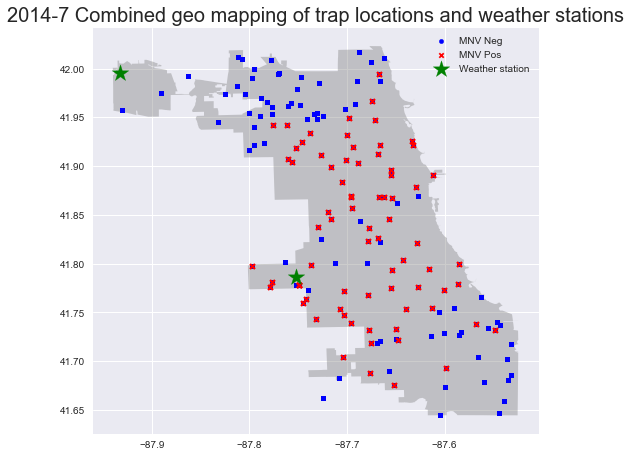

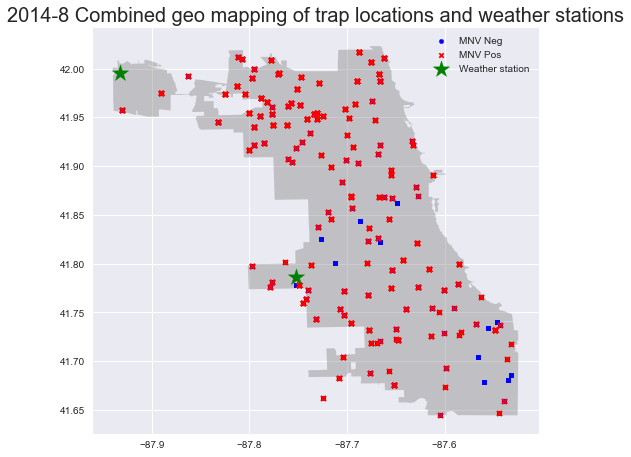

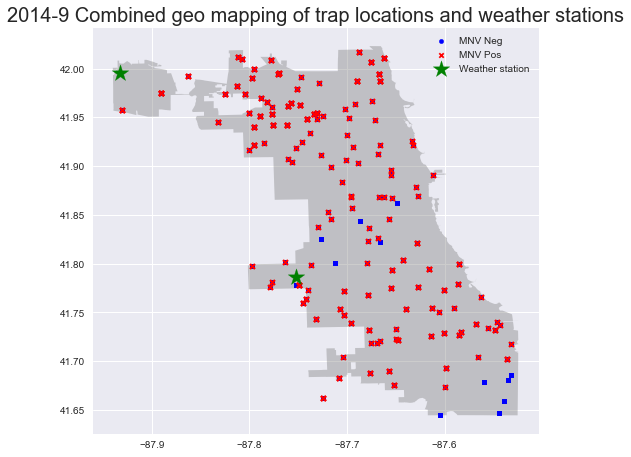

In [143]:
# Loop to plot the traps across years
yr=2014
mths=[7,8,9]
for mth in mths:
    fig, ax = plt.subplots(figsize=(8,8))
    neg_mask = (geo_tst_df['year']==yr) & (geo_tst_df['month']==mth) & (geo_tst_df['wnvpresent']<0.85)
    pos_mask = (geo_tst_df['year']==yr) & (geo_tst_df['month']==mth) & (geo_tst_df['wnvpresent']>=0.85)

    street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
    geo_tst_df[neg_mask].plot(ax=ax, markersize=20, color='blue',marker='o', label='MNV Neg')
    geo_tst_df[pos_mask].plot(ax=ax, markersize=20, color='red',marker='x', label='MNV Pos')
    geo_stn.plot(ax=ax, markersize=300, color='green', marker='*', label='Weather station');
    plt.title(f'{yr}-{mth} Combined geo mapping of trap locations and weather stations', fontdict={'fontsize':20})
    plt.legend();
    
# Combined geo mapping of trap locations, 2 weather stations, and spray area
# Red 'x' - 'WnrPresent' == 1
# Blue 'o' - 'WnrPresent' == 0
# Green '*' - Weather station 1 & 2
# Yellow 'x' - Spray   

In [144]:
%%html
<style> table {align:left;display:block} </style>
<!-- # code to left align markdown tables -->

---
## Conclusions
[top](#Contents)

We ran several models to analyse which was the most ideal model to predict if the mosquito would be infected for the West Nile Virus.
Models Analysed:
- Logistic Regression
- Logistic Regression with Principal Component Analysis
- Extra Trees
- XGBoost
- Random Forest
 
We ran the models on historical data for the years of 2007, 2009, 2011, 2013, where we had recorded data such as, weather data, spray data, how many mosquitoes were caught in traps and how many of these were infected with the West Nile Virus
The models' result were evaluated based on the ROC score metric, and the model that achieve the highest ROC score, was then used on data collected on 2014, to predict which mosquitoes were positive for West Nile Virus. 
ROC Score tells us the probability of predicting a mosquito infected with the West Nile Virus, hence the highest score would mean the model holds the highest probability to make a right prediction.

|           |   log_reg |   log_reg_pca | extra_trees | xgboost |	random_forest |
|:----------|:---------:|:-------------:|:-----------:|:-------:|:---------------:|
| ROC Score |	0.7201  |	0.7322      |	0.8141    |	**0.8520**  |	0.7363        |
				

XGBoost was deployed.

# Business Recommendation 
<br>
The model has shown that in 2014, there was a major outbreak of the West Nile Virus in Chicago, and spraying is of immediate importance.
The team has produced a cost benefit analysis for the Chicago Department. We studied the costs attached to spraying of pesticides, and also what costs would be incurred if no spraying was done.
The team drew reference to Sacramento County, California, where details of social costs and spraying costs were analysed. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3322011/)

### === Economic / Social Costs without spraying ===

| Economic Cost   Breakdown |                              |         |
|:--------------------------|:-----------------------------|--------:|
| Medical Cost              |                              |         |
|                           | Inpatient Cost               | 33,143  |
|                           | Outpatient Cost              |  1,424  |
|                           |                              |         |
| Productivity Cost         |                              |         |
|                           | Productivity cost per day    |  191    |
|                           | No. of days recuperating     |  60     |
|                           | Productivity Cost per person |  11,460 |
|                           |                              |         |
| Total Cost                |                              |  46,027 |

| Rate of Infection |                   |              |
|:-----------------:|:-----------------:|:------------:|
|                   | Sacramento County |    Chicago   |
|     Population    |    1.36 million   | 2.80 million |
|     WNV Cases     |        163        |      336     |
|   Infection Rate  |       0.012%      |              |

###    === Cost of Spraying === 

| Spraying Cost         |                   |                 |
|:---------------------:|:-----------------:|:---------------:|
|                       | Sacramento County |     Chicago     |
|          Area         |     2,574 km2     |     606 km2     |
|      Sprayed Area     |      477 km2      |                 |
| Sprayed $Cost per Area|   1,662 per km2   |  1,662 per km2  |
|     Spraying  Cost    |      701,790      |                 |

The table shows that cost of spraying would be offset if X amount of Chicago residents got infected, we urged the Chicago town council to go ahead with spraying.
Additional measures should also be in placed, the team recommends

### === Social Education ===
- Educate public that prevention is better than cure. The best way to preventing West Nile virus and other mosquito-borne illnesses is to avoid exposure to mosquitoes and eliminate standing water, where mosquitoes breed.
 
### === Birds/Pests Population Monitoring ===
- Most cases of West Nile virus occur June through September during warm weather, when mosquitos are active. It was found that West Nile virus spreads to humans and animals via infected mosquitoes. Mosquitoes become infected when they feed on infected birds which carry a high level of the virus in their bloodstream. The infected mosquitoes can pass the virus to more birds when they bite.
- Birds/Pests are known to be carrier of viruses, hence active monitoring should be on such animals/insects.
 <br>
 
# Limitations / Further Exploration to be considered
1. We assumed the economic/social costs would not differ in different areas of USA , and also assumed that the there is no cost of inflation from 2005 to 2014.
2. Weather stations was forward filled, i.e the missing values in station 2 were filled with station 1, with such an imputation, we would presumed that weather recordings would not differ much, though the weather stations were located at different elevations from sea level.
3. The time lag for weather data can be adjusted between 3 to 30
4. Fine tuning more model parameters, such as in our decision tree models, we could adjust (n_estimators, min_samples_leaf, max_depth etc)
5. Post spray cost effectiveness, i.e. Did number of mosquitoes reduce after spraying in the past years.
6. Do a poisson regression to predict the number of mosquitoes present
7. Find number of projected infected cases by year (infection rate)